In [25]:
import pandas as pd
data = [pd.read_csv(f'C:\\Users\\MITUL\\Documents\\csv\\time_series\\imd\\imd weather colaba {x}.csv') for x in range(2018, 2024)]
# len(data)

In [19]:
# df2018, df2019, df2020, df2021, df2022, df2023 = data

In [26]:
dataframes = [df2018, df2019, df2020, df2021, df2022, df2023]

In [46]:
# import pandas as pd

# # Assuming you've already loaded your dataframes as shown in your snippet
# dataframes = [df2018, df2019, df2020, df2021, df2022, df2023]

# # Iterate through each DataFrame and print the required statistics
# for i, df in enumerate(dataframes, start=2018):
#     print(f"Year: {i}")
#     print("Minimum Values:\n", df.min())
#     print("\nMaximum Values:\n", df.max())
#     print("\nNumber of Unique Values:\n", df.nunique())
#     print("\n---------------------------------\n")


In [ ]:
# # Initialize sets to track columns
# min_zero_or_nan_cols = set(dataframes[0].columns)
# max_zero_or_nan_cols = set(dataframes[0].columns)
# unique_one_cols = set(dataframes[0].columns)

# # Iterate through each DataFrame
# for df in dataframes:
#     current_min = df.min()
#     current_max = df.max()
#     current_unique = df.nunique()

#     # Update tracking sets
#     min_zero_or_nan_cols &= set(current_min[current_min.isna() | (current_min == 0)].index)
#     max_zero_or_nan_cols &= set(current_max[current_max.isna() | (current_max == 0)].index)
#     unique_one_cols &= set(current_unique[current_unique == 1].index)

# # Common columns with min value consistently NaN or 0
# print("Columns with min consistently NaN or 0:\n", min_zero_or_nan_cols)

# # Common columns with max value consistently NaN or 0
# print("Columns with max consistently NaN or 0:\n", max_zero_or_nan_cols)

# # Common columns with only one unique value (potentially all NaN or 0)
# print("Columns with only one unique value:\n", unique_one_cols)

In [ ]:

# # Columns to check for unique values
# columns_to_check = ['WIND SPEED MAX / GUST 10 m (Kt)', 'RAIN FALL CUM. SINCE 0300 UTC (mm)', 
#                     'WIND SPEED 10 m (Kt)', 'RH DAY MIN MAX (%)', 'SUN SHINE (HH.MM)']

# # Iterate through each column
# for column in columns_to_check:
#     print(f"Unique values in '{column}':")
#     # Iterate through each DataFrame year-wise
#     for i, df in enumerate(dataframes, start=2018):
#         if column in df.columns:
#             unique_values = df[column].unique()
#             print(f" - {i}: {unique_values}")
#     print("\n---------------------------------\n")


In [27]:
# Columns to be removed
columns_to_drop = ['DISTRICT','STATION','S NO.','RH DAY MIN MAX (%)', 'BATTERY (Volts)', 'GPS',"TEMP DAY MIN. ('C)","TEMP DAY MAX. ('C)","WIND SPEED MAX / GUST 10 m (Kt)","SUN SHINE (HH.MM)","MSLP (hPa / gpm)"]

In [ ]:
for df in dataframes:
    df.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
for df in dataframes:
    # Concatenate date and time into a single column
    df['Datetime'] = pd.to_datetime(df['DATE(YYYY-MM-DD)'] + ' ' + df['TIME (UTC)'])
    
    # Set the new 'Datetime' column as the index
    df.set_index('Datetime', inplace=True)
    
    # Optionally, drop the original date and time columns
    df.drop(['DATE(YYYY-MM-DD)', 'TIME (UTC)'], axis=1, inplace=True)

In [29]:
df = pd.concat([df2018, df2019, df2020, df2021, df2022, df2023])

In [ ]:


# # Creating a summary DataFrame
# summary = pd.DataFrame()

# for i, df in enumerate(dataframes):
#     year = 2018 + i  # Assuming the first DataFrame corresponds to the year 2018
#     total_rows = len(df)
#     null_percentages = (df.isna().sum() / total_rows) * 100
#     summary[year] = null_percentages

# summary


In [ ]:
# for i, df in enumerate(dataframes, start=2018):
#     print(f"Year: {i}")
#     null_or_nan_rows = df[df.isnull().any(axis=1)]
#     print(null_or_nan_rows)
#     print("\n---------------------------------\n")


In [30]:
# renaming 
df.columns = pd.Index(['RAINFALL', "TEMP", 'RH', 'WIND DIR', 'WIND SPEED', 'SLP' ], dtype='object')

In [31]:
df

,RAINFALL,TEMP,RH,WIND DIR,WIND SPEED,SLP
Datetime,,,,,,
2018-01-01 05:00:00,0.0,24.9,78.0,129.0,3.0,1011.6
2018-01-01 06:00:00,0.0,39.4,64.0,113.0,3.0,1011.0
2018-01-01 07:00:00,0.0,27.8,56.0,289.0,3.0,1009.9
2018-01-01 08:00:00,0.0,26.9,65.0,337.0,3.0,1008.6
2018-01-01 09:00:00,0.0,26.8,69.0,329.0,3.0,1007.6
...,...,...,...,...,...,...
2023-03-16 14:00:00,0.0,27.9,86.0,236.0,0.0,1009.2
2023-03-16 14:15:00,0.0,27.7,86.0,170.0,0.0,1009.4
2023-03-16 14:30:00,0.0,26.5,73.0,108.0,6.0,1009.6


In [32]:
df.isna().sum()

RAINFALL         1
TEMP            45
RH             256
WIND DIR      1861
WIND SPEED    1861
SLP             86
dtype: int64

In [13]:
df.columns.tolist()

['RAINFALL', 'TEMP', 'RH', 'WIND DIR', 'WIND SPEED', 'SLP']

In [ ]:

# # Creating a summary DataFrame
# summary = pd.DataFrame()

# for i, df in enumerate(dataframes):
#     year = 2018 + i  # Assuming the first DataFrame corresponds to the year 2018
#     total_rows = len(df)
#     null_percentages = (df.isna().sum() / total_rows) * 100
#     summary[year] = null_percentages

# summary

In [33]:
df

,RAINFALL,TEMP,RH,WIND DIR,WIND SPEED,SLP
Datetime,,,,,,
2018-01-01 05:00:00,0.0,24.9,78.0,129.0,3.0,1011.6
2018-01-01 06:00:00,0.0,39.4,64.0,113.0,3.0,1011.0
2018-01-01 07:00:00,0.0,27.8,56.0,289.0,3.0,1009.9
2018-01-01 08:00:00,0.0,26.9,65.0,337.0,3.0,1008.6
2018-01-01 09:00:00,0.0,26.8,69.0,329.0,3.0,1007.6
...,...,...,...,...,...,...
2023-03-16 14:00:00,0.0,27.9,86.0,236.0,0.0,1009.2
2023-03-16 14:15:00,0.0,27.7,86.0,170.0,0.0,1009.4
2023-03-16 14:30:00,0.0,26.5,73.0,108.0,6.0,1009.6


In [34]:
# Assume your DataFrame is named df
# Replace 'df' with the name of your DataFrame variable
df.to_csv('clean.csv', index=True)

# To trigger a download link in Jupyter Notebook:
from IPython.display import FileLink
FileLink('clean.csv')  # Creates a link to download the CSV file


C:\Users\MITUL\Documents\csv\xray_dataset_covid19\clean.csv

In [35]:
from IPython.display import HTML

def create_download_link(filename):
    html = f'<a href="{filename}" download>Click here to download {filename}</a>'
    return HTML(html)

create_download_link('clean.csv')


In [18]:
d = d.resample('H').mean().interpolate(method='time')

In [43]:
d.isna().sum()

Datetime         0
RAINFALL         1
TEMP            45
RH             256
WIND DIR      1861
WIND SPEED    1861
SLP             86
dtype: int64

In [44]:
d

,Datetime,RAINFALL,TEMP,RH,WIND DIR,WIND SPEED,SLP
0,2018-01-01 05:00:00,0.0,24.9,78.0,129.0,3.0,1011.6
1,2018-01-01 06:00:00,0.0,39.4,64.0,113.0,3.0,1011.0
2,2018-01-01 07:00:00,0.0,27.8,56.0,289.0,3.0,1009.9
3,2018-01-01 08:00:00,0.0,26.9,65.0,337.0,3.0,1008.6
4,2018-01-01 09:00:00,0.0,26.8,69.0,329.0,3.0,1007.6
...,...,...,...,...,...,...,...
134247,2023-03-16 14:00:00,0.0,27.9,86.0,236.0,0.0,1009.2
134248,2023-03-16 14:15:00,0.0,27.7,86.0,170.0,0.0,1009.4
134249,2023-03-16 14:30:00,0.0,26.5,73.0,108.0,6.0,1009.6
134250,2023-03-16 14:45:00,0.0,26.0,73.0,121.0,1.0,1009.7


In [2]:
import pandas as pd

In [1]:
import os
print(os.getcwd())  # This will print the current working directory



C:\Users\MITUL\Documents\csv\xray_dataset_covid19


In [2]:
os.chdir('C:\\Users\\MITUL\\Documents\\csv\\')


In [41]:
file_path = 'time_series/imd/notreallyclean.csv'
d = pd.read_csv(file_path)

In [42]:
d

,Datetime,RAINFALL,TEMP,RH,WIND DIR,WIND SPEED,SLP
0,2018-01-01 05:00:00,0.0,24.9,78.0,129.0,3.0,1011.6
1,2018-01-01 06:00:00,0.0,39.4,64.0,113.0,3.0,1011.0
2,2018-01-01 07:00:00,0.0,27.8,56.0,289.0,3.0,1009.9
3,2018-01-01 08:00:00,0.0,26.9,65.0,337.0,3.0,1008.6
4,2018-01-01 09:00:00,0.0,26.8,69.0,329.0,3.0,1007.6
...,...,...,...,...,...,...,...
134247,2023-03-16 14:00:00,0.0,27.9,86.0,236.0,0.0,1009.2
134248,2023-03-16 14:15:00,0.0,27.7,86.0,170.0,0.0,1009.4
134249,2023-03-16 14:30:00,0.0,26.5,73.0,108.0,6.0,1009.6
134250,2023-03-16 14:45:00,0.0,26.0,73.0,121.0,1.0,1009.7


In [43]:
# Filling the missing value in the 'RAINFALL' column with 0.032 mm
d['RAINFALL'].fillna(0.032, inplace=True)

# Code to verify the change
# Since we previously filled the only NaN value in 'RAINFALL', we can check if there are any NaN values left
remaining_nan_in_rainfall = d['RAINFALL'].isna().sum()


In [44]:
print(remaining_nan_in_rainfall)

0


In [45]:
# Converting 'Datetime' column to datetime type for time-based interpolation
d['Datetime'] = pd.to_datetime(d['Datetime'])
d.set_index('Datetime', inplace=True)

# Applying time-based interpolation to the 'TEMP' column
d['TEMP'] = d['TEMP'].interpolate(method='time')

# Resetting the index to get 'Datetime' back as a column
d.reset_index(inplace=True)

In [46]:
print(d['TEMP'].isna().sum())

0


In [47]:
# Assuming 'd' is your dataframe
# Apply linear interpolation to the 'SLP' column
d['SLP'] = d['SLP'].interpolate(method='linear')

# Now the dataframe 'd' has the missing values in 'SLP' filled using linear interpolation


In [48]:
print(d['SLP'].isna().sum())

0


In [49]:
d['RH'] = d['RH'].interpolate(method='linear')

In [51]:
print(d['RH'].isna().sum())

0


In [52]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [53]:
d


,Datetime,RAINFALL,TEMP,RH,WIND DIR,WIND SPEED,SLP
0,2018-01-01 05:00:00,0.0,24.9,78.0,129.0,3.0,1011.6
1,2018-01-01 06:00:00,0.0,39.4,64.0,113.0,3.0,1011.0
2,2018-01-01 07:00:00,0.0,27.8,56.0,289.0,3.0,1009.9
3,2018-01-01 08:00:00,0.0,26.9,65.0,337.0,3.0,1008.6
4,2018-01-01 09:00:00,0.0,26.8,69.0,329.0,3.0,1007.6
...,...,...,...,...,...,...,...
134247,2023-03-16 14:00:00,0.0,27.9,86.0,236.0,0.0,1009.2
134248,2023-03-16 14:15:00,0.0,27.7,86.0,170.0,0.0,1009.4
134249,2023-03-16 14:30:00,0.0,26.5,73.0,108.0,6.0,1009.6
134250,2023-03-16 14:45:00,0.0,26.0,73.0,121.0,1.0,1009.7


In [54]:

# Select the columns for MICE imputation
columns_for_mice = ['WIND DIR', 'WIND SPEED']

# Apply MICE imputation
from sklearn.experimental import enable_iterative_imputer  # Ensure this is imported
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=0)
d = d.copy()
d[columns_for_mice] = imputer.fit_transform(d[columns_for_mice])

# Reset the index to get 'Datetime' back as a column
d.reset_index(inplace=True)


In [55]:
print(d['WIND DIR'].isna().sum())

0


In [56]:
print(d['WIND SPEED'].isna().sum())

0


In [8]:
# Assuming 'd' is your DataFrame

# Convert 'Datetime' column to datetime type and set it as the index
d['Datetime'] = pd.to_datetime(d['Datetime'])
d.set_index('Datetime', inplace=True)


# Now 'd' has 'Datetime' as the index and no 'index' column


In [6]:
d

,Datetime,RAINFALL,TEMP,RH,WIND DIR,WIND SPEED,SLP
0,2018-01-01 05:00:00,0.0,24.9,78.0,129.0,3.0,1011.6
1,2018-01-01 06:00:00,0.0,39.4,64.0,113.0,3.0,1011.0
2,2018-01-01 07:00:00,0.0,27.8,56.0,289.0,3.0,1009.9
3,2018-01-01 08:00:00,0.0,26.9,65.0,337.0,3.0,1008.6
4,2018-01-01 09:00:00,0.0,26.8,69.0,329.0,3.0,1007.6
...,...,...,...,...,...,...,...
134247,2023-03-16 14:00:00,0.0,27.9,86.0,236.0,0.0,1009.2
134248,2023-03-16 14:15:00,0.0,27.7,86.0,170.0,0.0,1009.4
134249,2023-03-16 14:30:00,0.0,26.5,73.0,108.0,6.0,1009.6
134250,2023-03-16 14:45:00,0.0,26.0,73.0,121.0,1.0,1009.7


In [ ]:
import pandas as pd
file_path = 'time_series/imd/data.csv'
d = pd.read_csv(file_path)

In [5]:
data=d

In [4]:
d

,Datetime,RAINFALL,TEMP,RH,WIND DIR,WIND SPEED,SLP
0,2018-01-01 05:00:00,0.0,24.9,78.0,129.0,3.0,1011.6
1,2018-01-01 06:00:00,0.0,39.4,64.0,113.0,3.0,1011.0
2,2018-01-01 07:00:00,0.0,27.8,56.0,289.0,3.0,1009.9
3,2018-01-01 08:00:00,0.0,26.9,65.0,337.0,3.0,1008.6
4,2018-01-01 09:00:00,0.0,26.8,69.0,329.0,3.0,1007.6
...,...,...,...,...,...,...,...
134247,2023-03-16 14:00:00,0.0,27.9,86.0,236.0,0.0,1009.2
134248,2023-03-16 14:15:00,0.0,27.7,86.0,170.0,0.0,1009.4
134249,2023-03-16 14:30:00,0.0,26.5,73.0,108.0,6.0,1009.6
134250,2023-03-16 14:45:00,0.0,26.0,73.0,121.0,1.0,1009.7


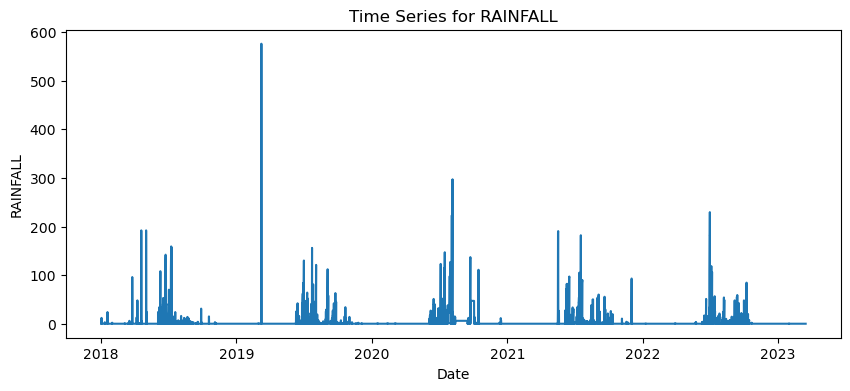

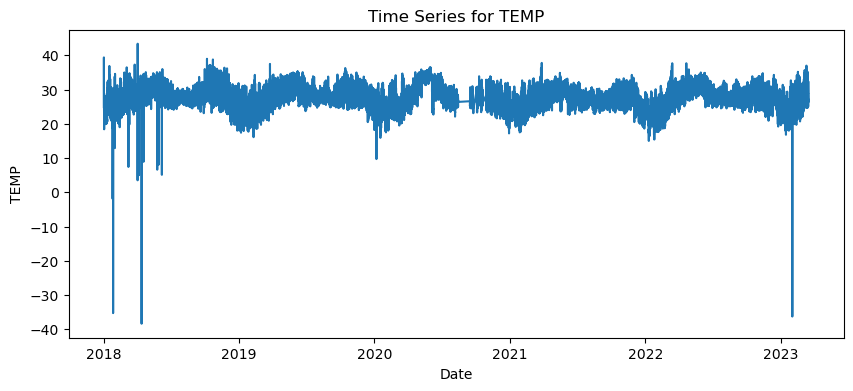

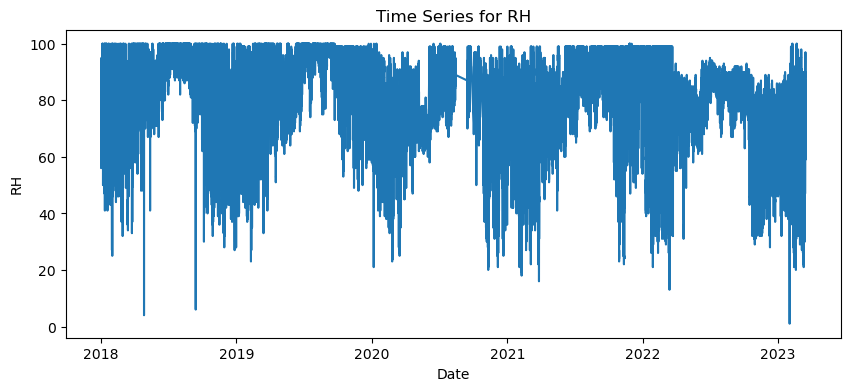

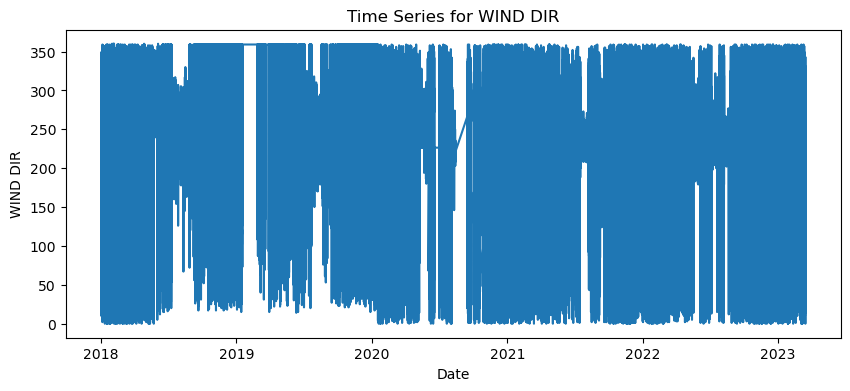

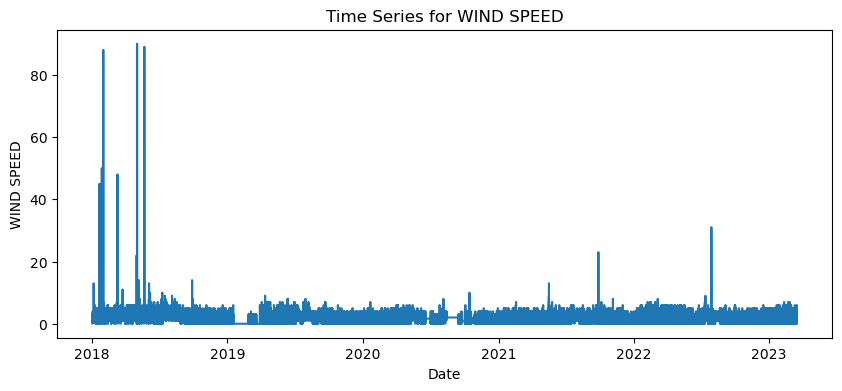

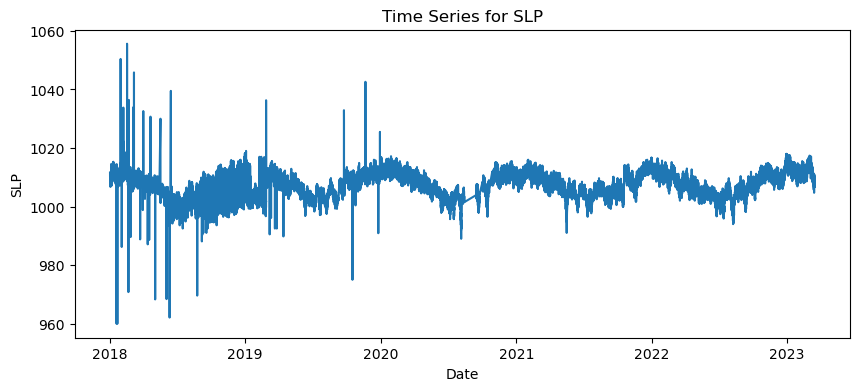

In [6]:
import matplotlib.pyplot as plt

data['Datetime'] = pd.to_datetime(data['Datetime'])
for column in data.columns.drop('Datetime'):
    plt.figure(figsize=(10, 4))
    plt.plot(data['Datetime'], data[column])
    plt.title(f'Time Series for {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.show()


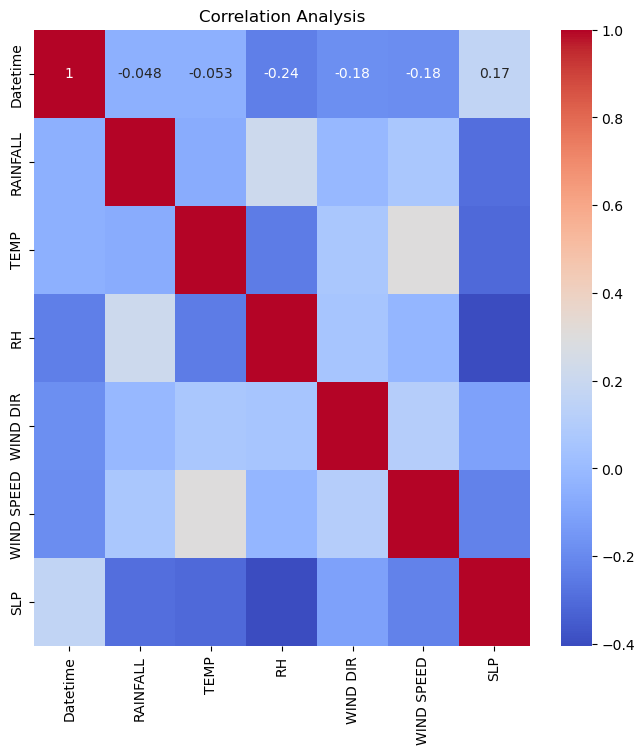

In [7]:
import seaborn as sns

correlation_matrix = data.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis')
plt.show()


In [8]:
columns=data.columns
print(columns)

Index(['Datetime', 'RAINFALL', 'TEMP', 'RH', 'WIND DIR', 'WIND SPEED', 'SLP'], dtype='object')


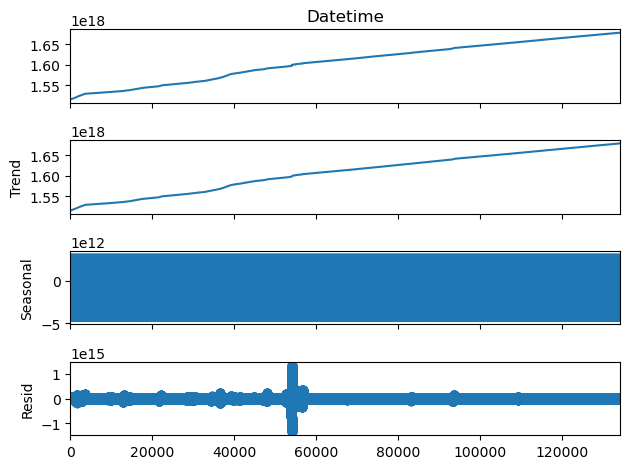

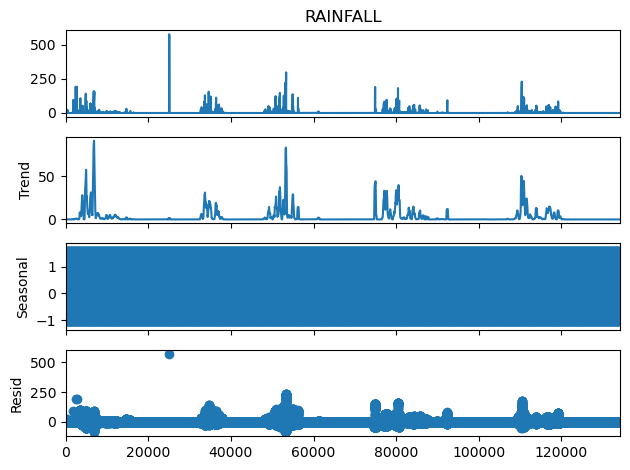

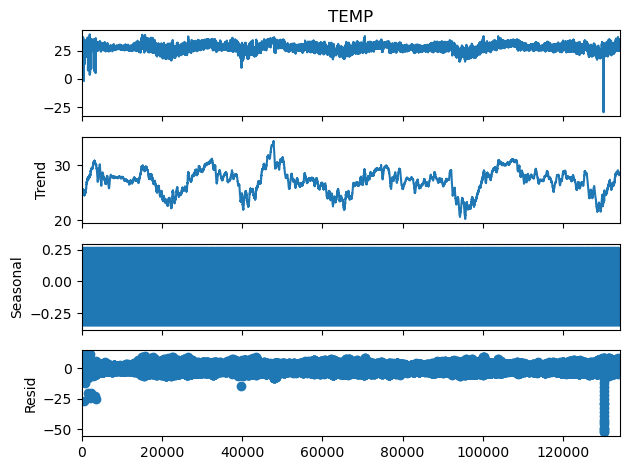

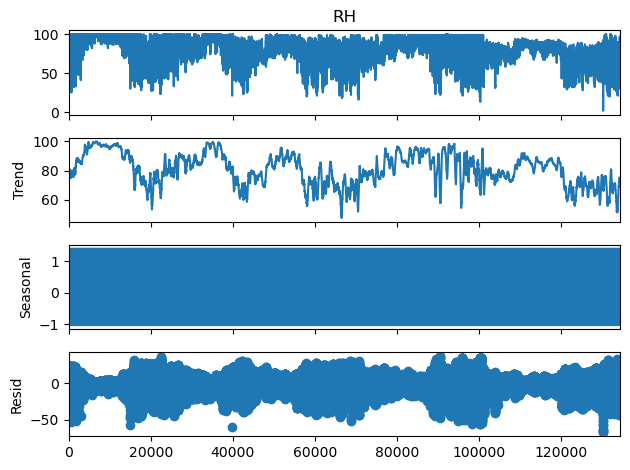

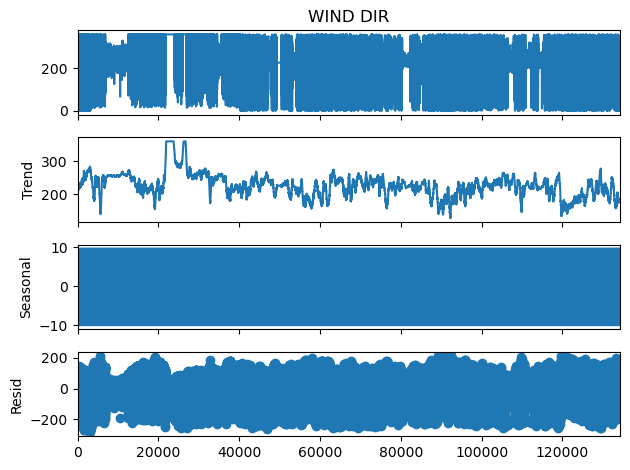

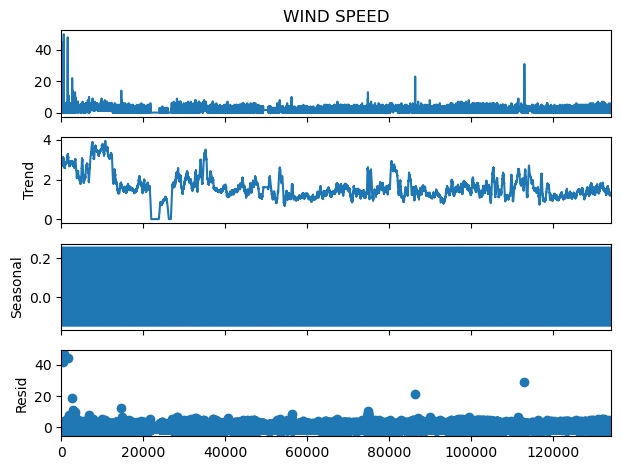

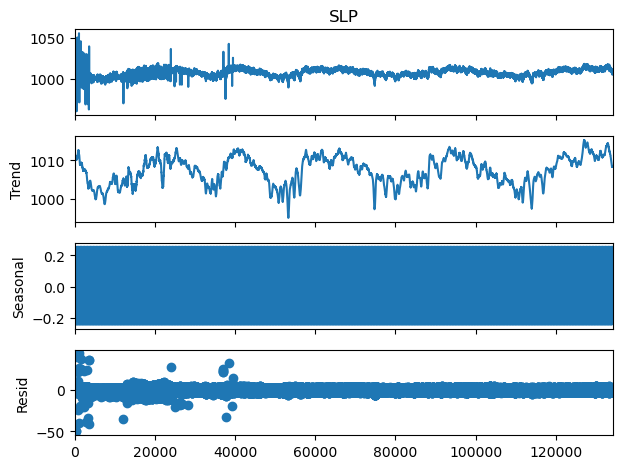

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

for column in columns:
    decomposition = seasonal_decompose(data[column], model='additive', period=365)
    decomposition.plot()
    plt.show()


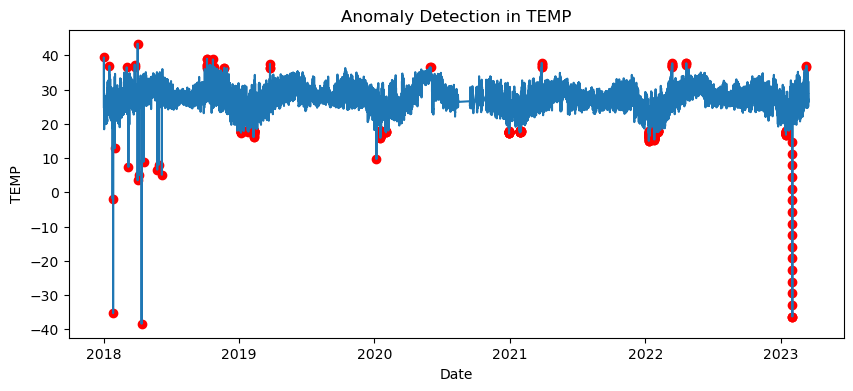

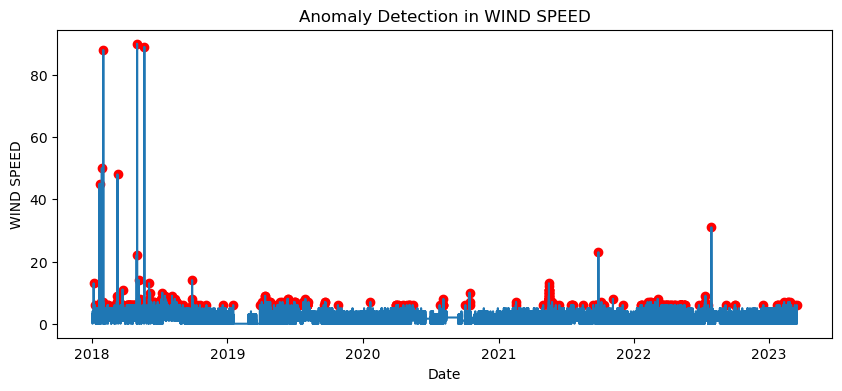

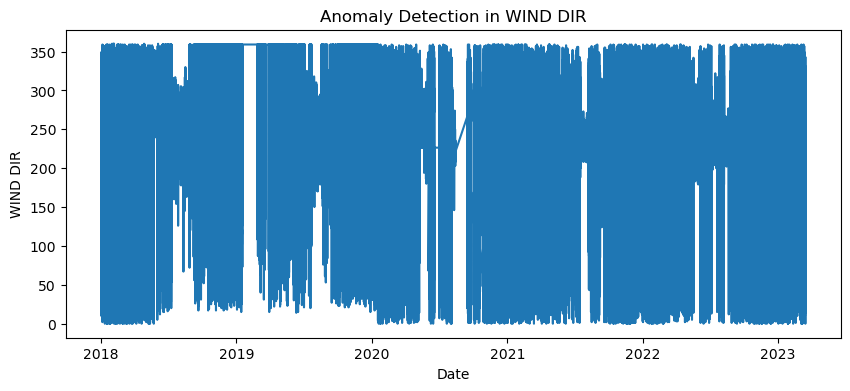

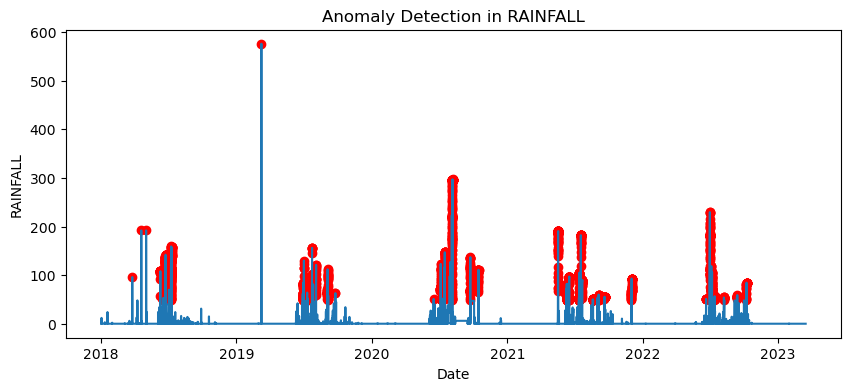

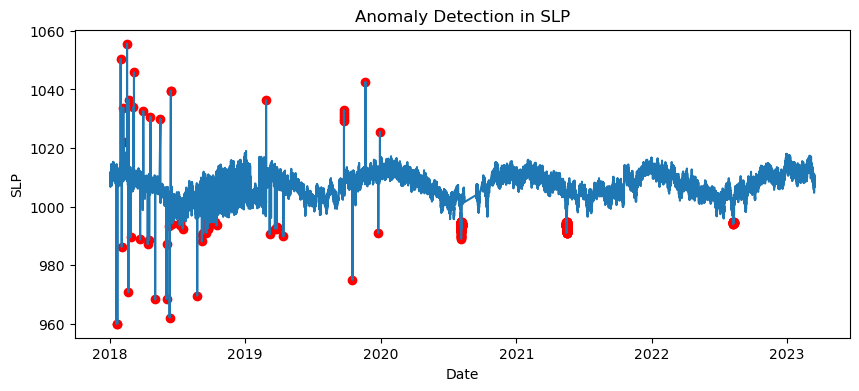

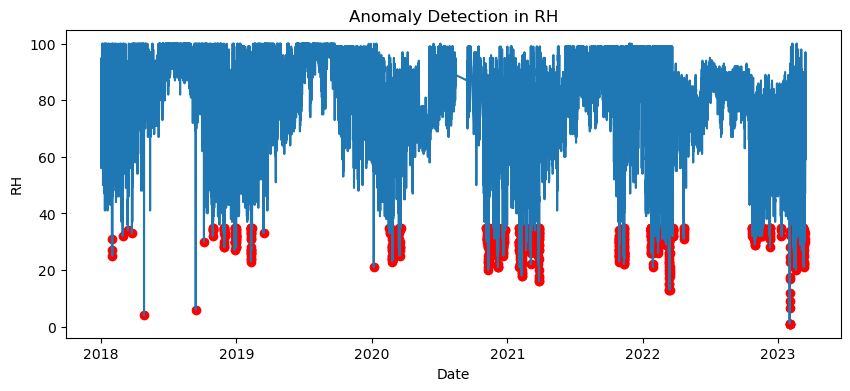

In [10]:
from scipy import stats
import numpy as np
for column in ['TEMP', 'WIND SPEED','WIND DIR','RAINFALL','SLP','RH']:
    data[f'{column}_zscore'] = stats.zscore(data[column])
    anomalies = data[np.abs(data[f'{column}_zscore']) > 3]  # Using Z-score > 3 as a threshold for anomalies
    plt.figure(figsize=(10, 4))
    plt.plot(data['Datetime'], data[column])
    plt.scatter(anomalies['Datetime'], anomalies[column], color='red')
    plt.title(f'Anomaly Detection in {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.show()


In [12]:
# Handling outliers in Rainfall, Temperature, Relative Humidity (RH), and Wind Speed

# 1. Remove the big spike in Rainfall
data = data[data['RAINFALL'] < 500]

# 2. Replace Temperature spikes
# Finding indices of spikes
temp_spikes_below = data[data['TEMP'] < 100].index
temp_spike_above = data[data['TEMP'] > 40].index

# Replacing spikes below -30 with the mean of their neighbors
for idx in temp_spikes_below:
    if idx > 0 and idx < len(data) - 1:
        data.loc[idx, 'TEMP'] = (data.loc[idx - 1, 'TEMP'] + data.loc[idx + 1, 'TEMP']) / 2

# Replacing spike above 40 with the maximum value (excluding the spike)
max_temp = data[data['TEMP'] < 40]['TEMP'].max()
data.loc[temp_spike_above, 'TEMP'] = max_temp

# 3. Replace RH spikes
rh_spikes_below = data[data['RH'] < 10].index
for idx in rh_spikes_below:
    if idx > 0 and idx < len(data) - 1:
        data.loc[idx, 'RH'] = (data.loc[idx - 1, 'RH'] + data.loc[idx + 1, 'RH']) / 2

# 4. Replace Wind Speed spikes
wind_speed_spikes_above = data[data['WIND SPEED'] > 50].index
for idx in wind_speed_spikes_above:
    if idx > 0 and idx < len(data) - 1:
        data.loc[idx, 'WIND SPEED'] = (data.loc[idx - 1, 'WIND SPEED'] + data.loc[idx + 1, 'WIND SPEED']) / 2

# Suggestion for Sea Level Pressure (SLP)
# Since the specifics for SLP outliers are not provided, one common approach is to use a similar method
# as used for other variables. For instance, replacing extreme values with neighboring means or a fixed threshold.

# Display the modified data
data.head()



,Datetime,RAINFALL,TEMP,RH,WIND DIR,WIND SPEED,SLP,TEMP_zscore,WIND SPEED_zscore,WIND DIR_zscore,RAINFALL_zscore,SLP_zscore,RH_zscore
0,2018-01-01 05:00:00,0.0,24.9,78.0,129.0,3.0,1011.6,-0.724812,1.0554,-1.155892,-0.221818,1.047898,-0.188370
1,2018-01-01 06:00:00,0.0,39.4,64.0,113.0,3.0,1011.0,4.001334,1.0554,-1.345839,-0.221818,0.902599,-1.118750
2,2018-01-01 07:00:00,0.0,27.8,56.0,289.0,3.0,1009.9,0.220418,1.0554,0.743579,-0.221818,0.636218,-1.650397
3,2018-01-01 08:00:00,0.0,26.9,65.0,337.0,3.0,1008.6,-0.072929,1.0554,1.313421,-0.221818,0.321405,-1.052295
4,2018-01-01 09:00:00,0.0,26.8,69.0,329.0,3.0,1007.6,-0.105524,1.0554,1.218447,-0.221818,0.079240,-0.786472


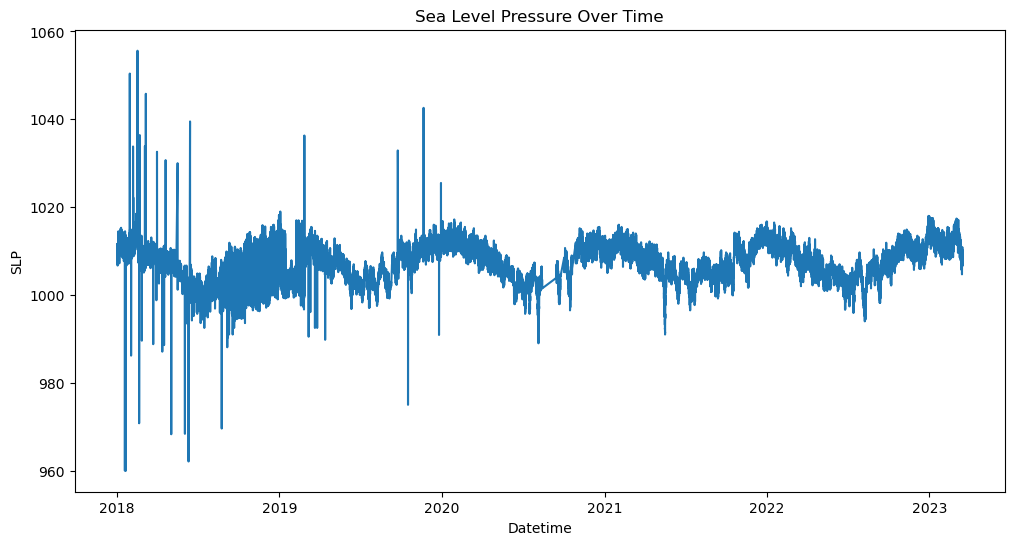

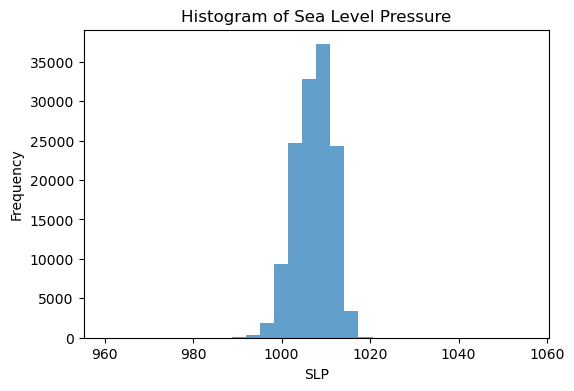

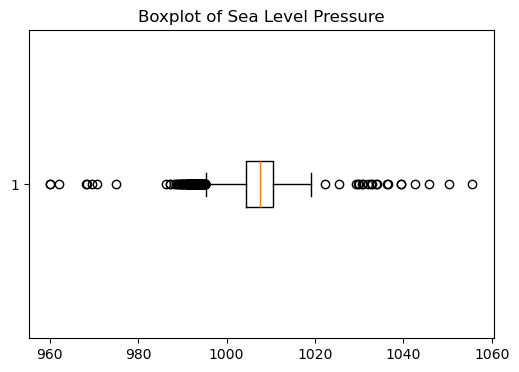

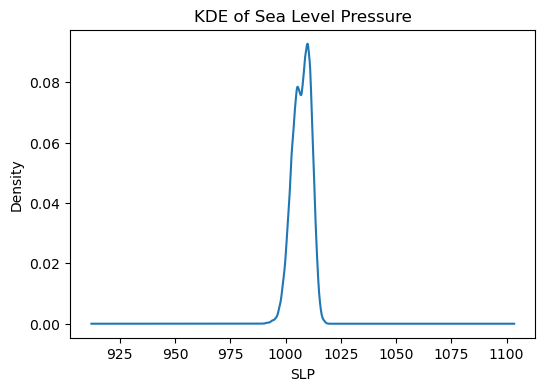

In [11]:
# Visualizations to understand SLP (Sea Level Pressure) better

# Plotting SLP over time
plt.figure(figsize=(12, 6))
plt.plot(data['Datetime'], data['SLP'])
plt.title('Sea Level Pressure Over Time')
plt.xlabel('Datetime')
plt.ylabel('SLP')
plt.show()

# Histogram of SLP
plt.figure(figsize=(6, 4))
plt.hist(data['SLP'], bins=30, alpha=0.7)
plt.title('Histogram of Sea Level Pressure')
plt.xlabel('SLP')
plt.ylabel('Frequency')
plt.show()

# Boxplot of SLP
plt.figure(figsize=(6, 4))
plt.boxplot(data['SLP'], vert=False)
plt.title('Boxplot of Sea Level Pressure')
plt.show()

# Kernel Density Estimate (KDE) of SLP
data['SLP'].plot(kind='kde', figsize=(6, 4))
plt.title('KDE of Sea Level Pressure')
plt.xlabel('SLP')
plt.show()





In [ ]:
# Function to replace outliers with the mean of their neighboring values
def replace_with_neighbor_mean(data, outlier_indices):
    for idx in outlier_indices:
        # Ensure index bounds are respected
        if idx > 0 and idx < len(data) - 1:
            # Calculate the mean of neighbors
            neighbor_mean = np.mean([data.iloc[idx - 1], data.iloc[idx + 1]])
            data.iloc[idx] = neighbor_mean
    return data

# Replacing outliers in the original SLP data
adjusted_slp = replace_with_neighbor_mean(df['SLP'].copy(), new_outliers.index)

# Plotting the adjusted SLP data
plt.figure(figsize=(12, 6))
plt.plot(df['Datetime'], adjusted_slp, label='Adjusted SLP', color='orange')
plt.plot(df['Datetime'], df['SLP'], label='Original SLP', color='blue', alpha=0.5)
plt.title('Sea-Level Pressure (SLP): Original vs Adjusted')
plt.xlabel('Datetime')
plt.ylabel('SLP')
plt.legend()
plt.show()


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Selecting independent variables (excluding 'Datetime' and 'SLP')
X = df.drop(['Datetime', 'SLP'], axis=1)

# Dependent variable
y = df['SLP']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Building the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting SLP
y_pred = model.predict(X_test)

# Calculating residuals
residuals = y_test - y_pred

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Displaying the mean squared error and a sample of residuals
mse, residuals.head()


(1.8590653989855497e-26,
 55257    -1.136868e-13
 76209    -1.136868e-13
 117498   -1.136868e-13
 10778    -1.136868e-13
 40224    -1.136868e-13
 Name: SLP, dtype: float64)

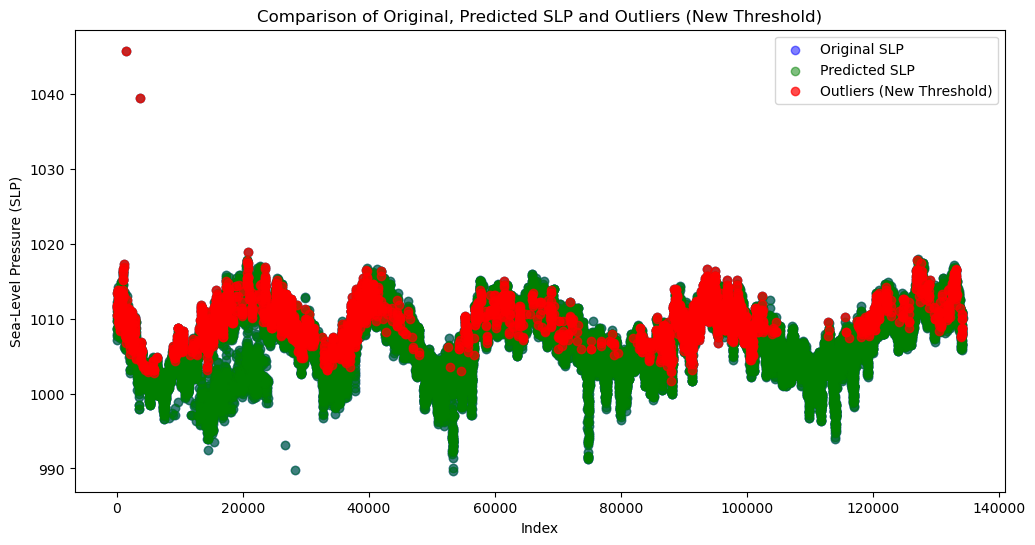

(3938, 2.933289634418854)

In [22]:
std_dev = residuals.std()
# Increasing the threshold to 3 standard deviations
new_threshold = 3 * std_dev

# Identifying outliers with the new threshold
new_outliers = residuals[np.abs(residuals) > new_threshold]
new_num_outliers = new_outliers.shape[0]

# Percentage of data points identified as outliers with the new threshold
new_percentage_outliers = (new_num_outliers / df.shape[0]) * 100

# Creating a new plot to show the outliers with the updated threshold
plt.figure(figsize=(12, 6))

# Plotting original SLP values
plt.scatter(X_test.index, y_test, color='blue', label='Original SLP', alpha=0.5)

# Plotting predicted SLP values
plt.scatter(X_test.index, y_pred, color='green', label='Predicted SLP', alpha=0.5)

# Highlighting outliers with the new threshold
plt.scatter(new_outliers.index, y_test[new_outliers.index], color='red', label='Outliers (New Threshold)', alpha=0.7)

plt.title('Comparison of Original, Predicted SLP and Outliers (New Threshold)')
plt.xlabel('Index')
plt.ylabel('Sea-Level Pressure (SLP)')
plt.legend()
plt.show()

new_num_outliers, new_percentage_outliers


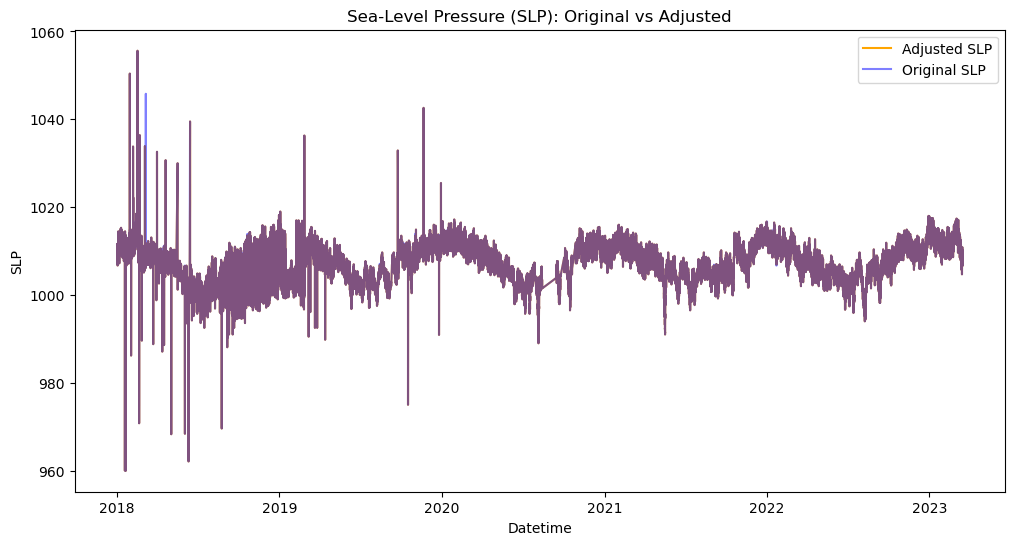

In [23]:
# Renaming the DataFrame to 'data' as per your specification
data = df.copy()

# Function to replace outliers with the mean of their neighboring values
def replace_with_neighbor_mean(data_frame, outlier_indices):
    for idx in outlier_indices:
        # Ensure index bounds are respected
        if idx > 0 and idx < len(data_frame) - 1:
            # Calculate the mean of neighbors
            neighbor_mean = np.mean([data_frame.iloc[idx - 1], data_frame.iloc[idx + 1]])
            data_frame.iloc[idx] = neighbor_mean
    return data_frame

# Replacing outliers in the original SLP data
adjusted_slp = replace_with_neighbor_mean(data['SLP'].copy(), new_outliers.index)

# Plotting the adjusted SLP data
plt.figure(figsize=(12, 6))
plt.plot(data['Datetime'], adjusted_slp, label='Adjusted SLP', color='orange')
plt.plot(data['Datetime'], data['SLP'], label='Original SLP', color='blue', alpha=0.5)
plt.title('Sea-Level Pressure (SLP): Original vs Adjusted')
plt.xlabel('Datetime')
plt.ylabel('SLP')
plt.legend()
plt.show()


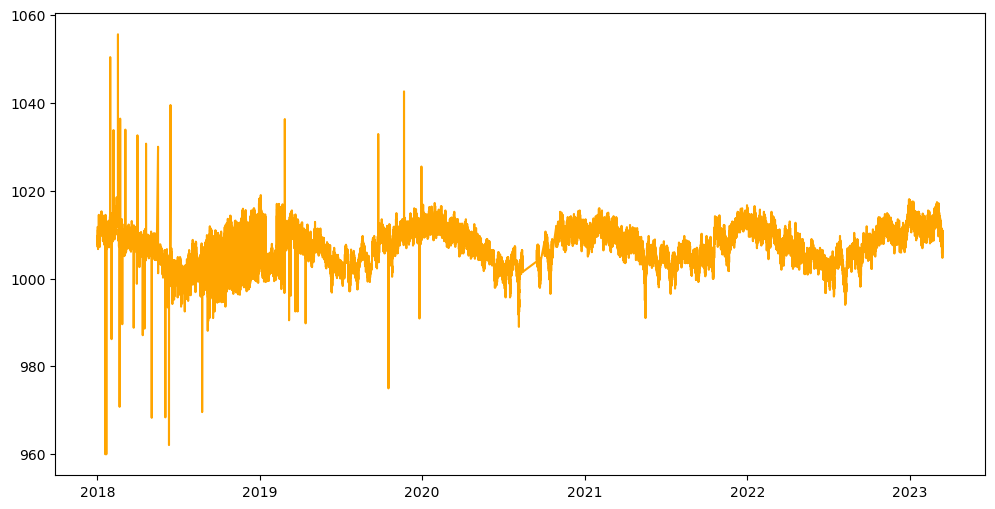

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(data['Datetime'], adjusted_slp, label='Adjusted SLP', color='orange')

In [18]:
# Assuming the DataFrame is named 'df' and the column for wind direction is named 'WIND DIR'

# Convert the wind direction from degrees to radians
wind_dir_radians = np.radians(data['WIND DIR'])

# Apply sine and cosine transformations
data['WIND DIR SIN'] = np.sin(wind_dir_radians)
data['WIND DIR COS'] = np.cos(wind_dir_radians)

# Displaying the first few rows of the dataframe to see the new columns
data.head()


,Datetime,RAINFALL,TEMP,RH,WIND DIR,WIND SPEED,SLP,TEMP_zscore,WIND SPEED_zscore,WIND DIR_zscore,RAINFALL_zscore,SLP_zscore,RH_zscore,WIND DIR SIN,WIND DIR COS
0,2018-01-01 05:00:00,0.0,24.9,78.0,129.0,3.0,1011.6,-0.724812,1.0554,-1.155892,-0.221818,1.047898,-0.188370,0.777146,-0.629320
1,2018-01-01 06:00:00,0.0,39.4,64.0,113.0,3.0,1011.0,4.001334,1.0554,-1.345839,-0.221818,0.902599,-1.118750,0.920505,-0.390731
2,2018-01-01 07:00:00,0.0,27.8,56.0,289.0,3.0,1009.9,0.220418,1.0554,0.743579,-0.221818,0.636218,-1.650397,-0.945519,0.325568
3,2018-01-01 08:00:00,0.0,26.9,65.0,337.0,3.0,1008.6,-0.072929,1.0554,1.313421,-0.221818,0.321405,-1.052295,-0.390731,0.920505
4,2018-01-01 09:00:00,0.0,26.8,69.0,329.0,3.0,1007.6,-0.105524,1.0554,1.218447,-0.221818,0.079240,-0.786472,-0.515038,0.857167


In [25]:
data

,Datetime,RAINFALL,TEMP,RH,WIND DIR,WIND SPEED,SLP,TEMP_zscore,WIND SPEED_zscore,WIND DIR_zscore,RAINFALL_zscore,SLP_zscore,RH_zscore
0,2018-01-01 05:00:00,0.0,24.9,78.0,129.0,3.0,1011.6,-0.724812,1.055400,-1.155892,-0.221818,1.047898,-0.188370
1,2018-01-01 06:00:00,0.0,39.4,64.0,113.0,3.0,1011.0,4.001334,1.055400,-1.345839,-0.221818,0.902599,-1.118750
2,2018-01-01 07:00:00,0.0,27.8,56.0,289.0,3.0,1009.9,0.220418,1.055400,0.743579,-0.221818,0.636218,-1.650397
3,2018-01-01 08:00:00,0.0,26.9,65.0,337.0,3.0,1008.6,-0.072929,1.055400,1.313421,-0.221818,0.321405,-1.052295
4,2018-01-01 09:00:00,0.0,26.8,69.0,329.0,3.0,1007.6,-0.105524,1.055400,1.218447,-0.221818,0.079240,-0.786472
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134247,2023-03-16 14:00:00,0.0,27.9,86.0,236.0,0.0,1009.2,0.253012,-1.232793,0.114379,-0.221818,0.466703,0.343276
134248,2023-03-16 14:15:00,0.0,27.7,86.0,170.0,0.0,1009.4,0.187823,-1.232793,-0.669153,-0.221818,0.515136,0.343276
134249,2023-03-16 14:30:00,0.0,26.5,73.0,108.0,6.0,1009.6,-0.203306,3.343592,-1.405198,-0.221818,0.563569,-0.520649
134250,2023-03-16 14:45:00,0.0,26.0,73.0,121.0,1.0,1009.7,-0.366276,-0.470062,-1.250866,-0.221818,0.587785,-0.520649


In [26]:
data.columns

Index(['Datetime', 'RAINFALL', 'TEMP', 'RH', 'WIND DIR', 'WIND SPEED', 'SLP',
       'TEMP_zscore', 'WIND SPEED_zscore', 'WIND DIR_zscore',
       'RAINFALL_zscore', 'SLP_zscore', 'RH_zscore'],
      dtype='object')

In [27]:
data.drop(['TEMP_zscore', 'WIND SPEED_zscore', 'WIND DIR_zscore', 'RAINFALL_zscore', 'SLP_zscore', 'RH_zscore'], axis=1, inplace=True)


In [28]:
data

,Datetime,RAINFALL,TEMP,RH,WIND DIR,WIND SPEED,SLP
0,2018-01-01 05:00:00,0.0,24.9,78.0,129.0,3.0,1011.6
1,2018-01-01 06:00:00,0.0,39.4,64.0,113.0,3.0,1011.0
2,2018-01-01 07:00:00,0.0,27.8,56.0,289.0,3.0,1009.9
3,2018-01-01 08:00:00,0.0,26.9,65.0,337.0,3.0,1008.6
4,2018-01-01 09:00:00,0.0,26.8,69.0,329.0,3.0,1007.6
...,...,...,...,...,...,...,...
134247,2023-03-16 14:00:00,0.0,27.9,86.0,236.0,0.0,1009.2
134248,2023-03-16 14:15:00,0.0,27.7,86.0,170.0,0.0,1009.4
134249,2023-03-16 14:30:00,0.0,26.5,73.0,108.0,6.0,1009.6
134250,2023-03-16 14:45:00,0.0,26.0,73.0,121.0,1.0,1009.7


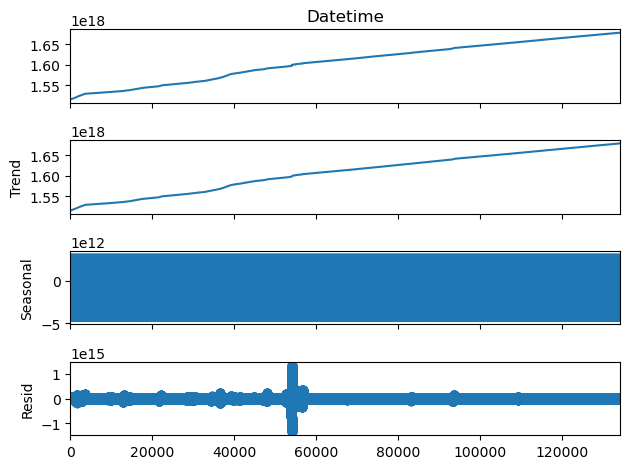

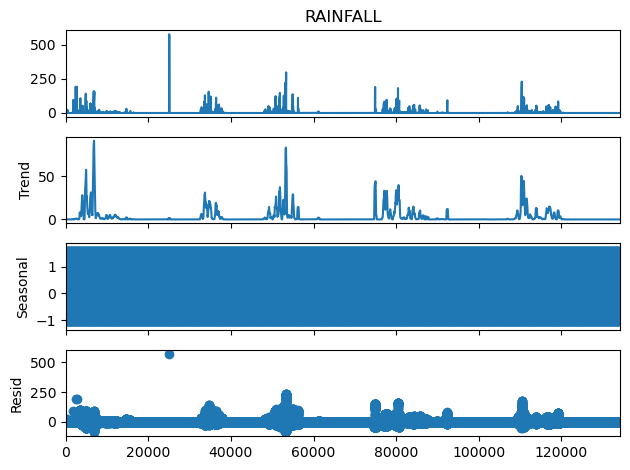

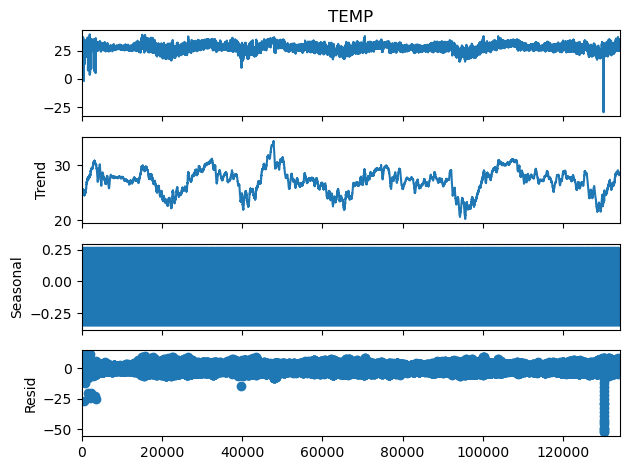

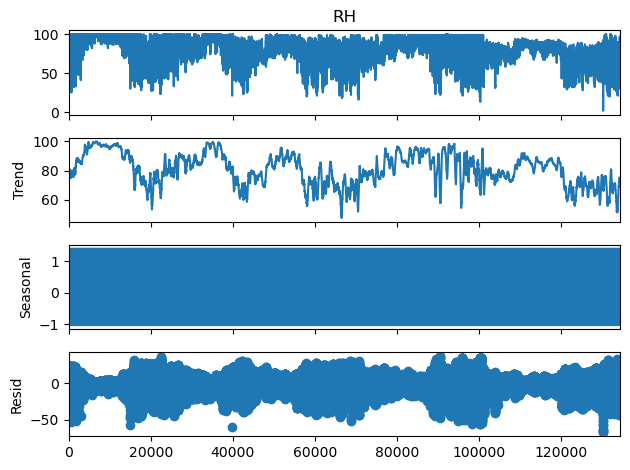

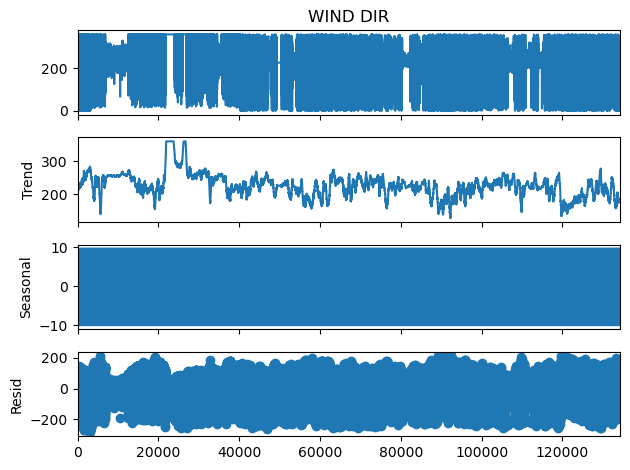

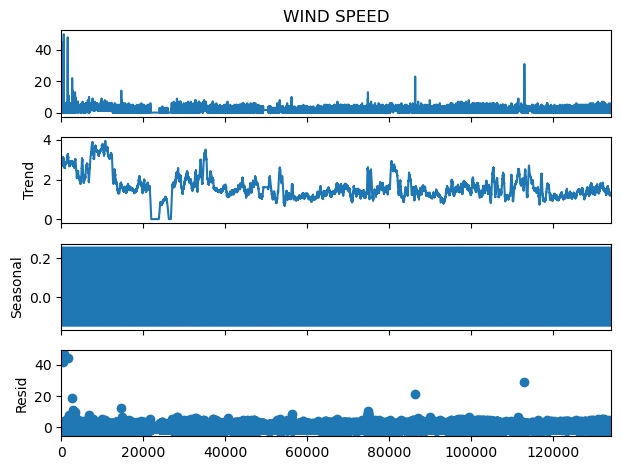

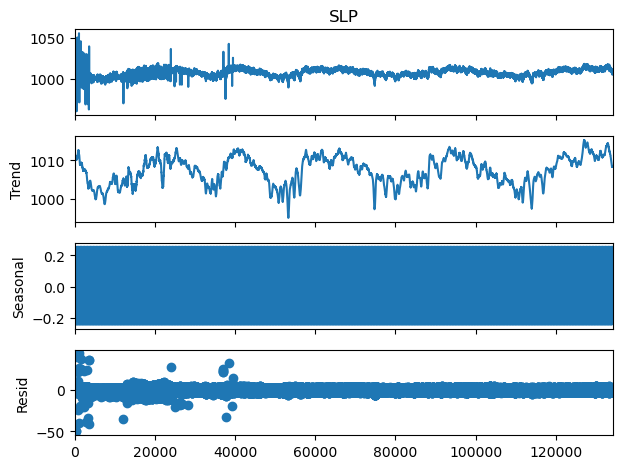

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

for column in columns:
    decomposition = seasonal_decompose(data[column], model='additive', period=365)
    decomposition.plot()
    plt.show()


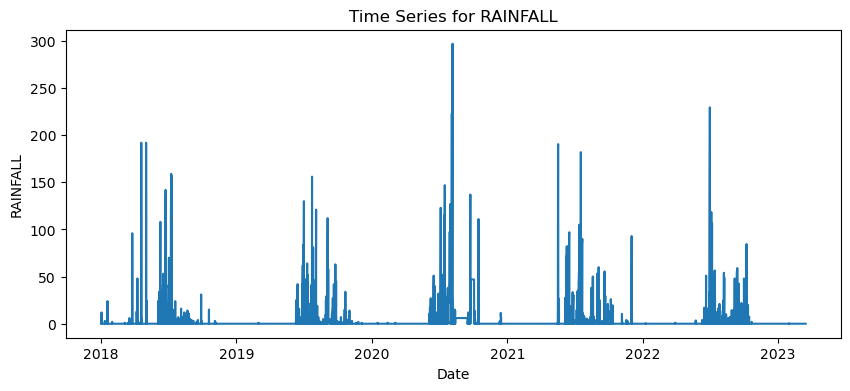

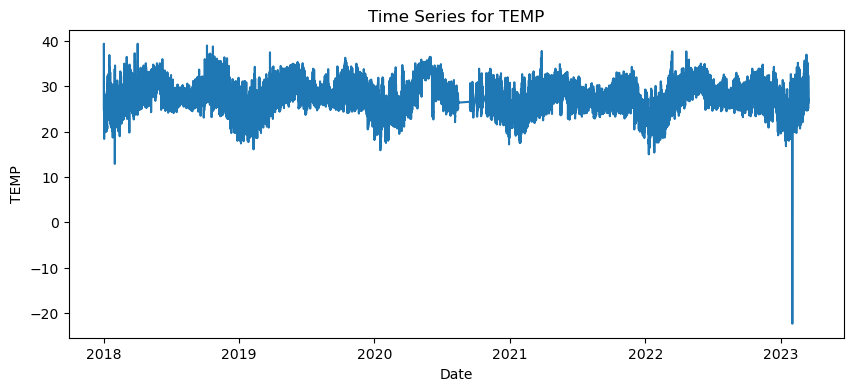

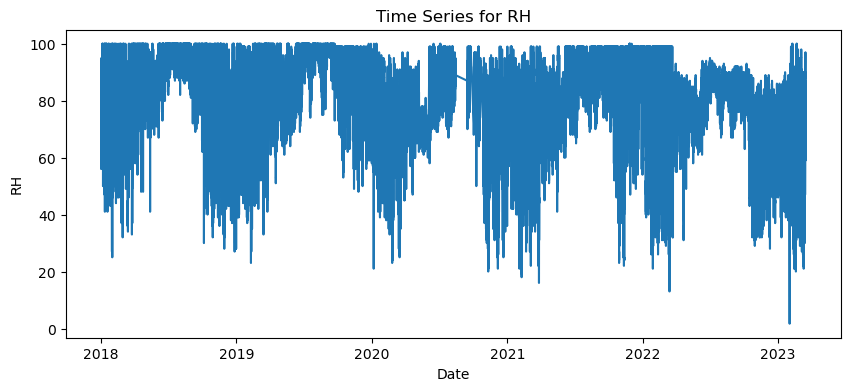

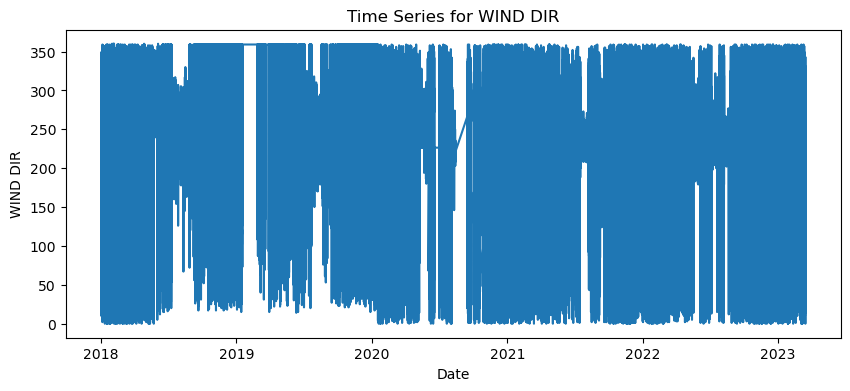

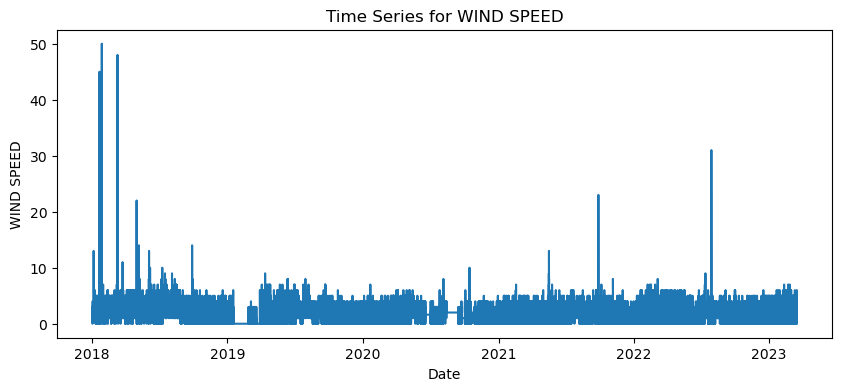

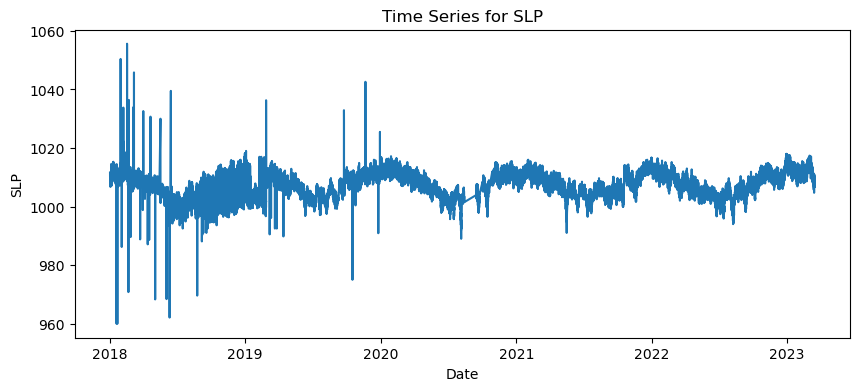

In [37]:
import matplotlib.pyplot as plt

for column in data.columns.drop('Datetime'):
    plt.figure(figsize=(10, 4))
    plt.plot(data['Datetime'], data[column])
    plt.title(f'Time Series for {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.show()


In [32]:
# 1. Remove the big spike in Rainfall
data = data[data['RAINFALL'] < 500]


In [44]:
temp_spikes_below = d[d['TEMP'] < 10].index

# Replacing spikes below 10 with the mean of their neighbors
for idx in temp_spikes_below:
    if idx > 0 and idx < len(data) - 1:
        d.loc[idx, 'TEMP'] = (d.loc[idx - 1, 'TEMP'] + d.loc[idx + 1, 'TEMP']) / 2

In [40]:
d.columns


Index(['Datetime', 'RAINFALL', 'TEMP', 'RH', 'WIND DIR', 'WIND SPEED', 'SLP',
       'TEMP_zscore', 'WIND SPEED_zscore', 'WIND DIR_zscore',
       'RAINFALL_zscore', 'SLP_zscore', 'RH_zscore'],
      dtype='object')

In [42]:
d.drop(['TEMP_zscore', 'WIND SPEED_zscore', 'WIND DIR_zscore', 'RAINFALL_zscore', 'SLP_zscore', 'RH_zscore'], axis=1, inplace=True)


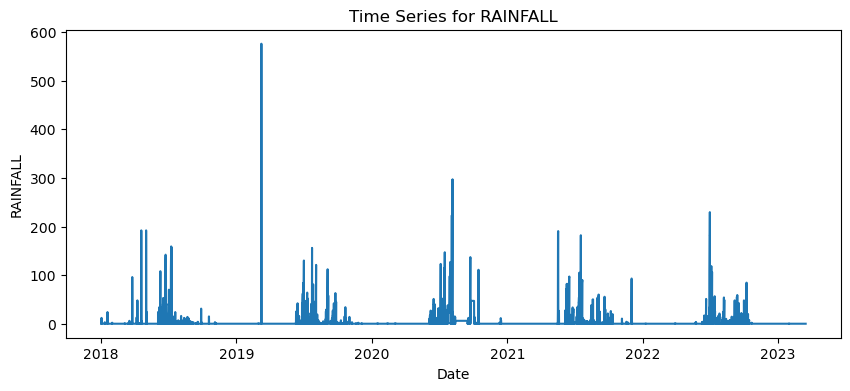

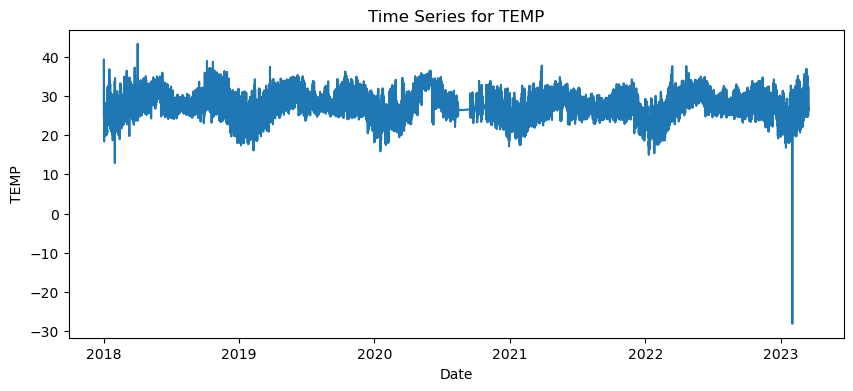

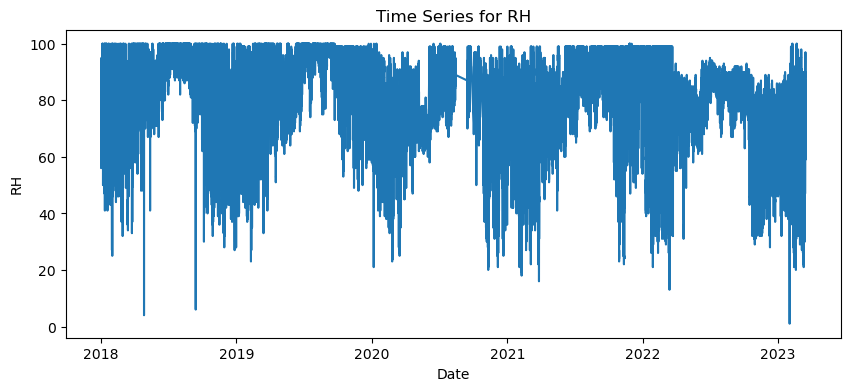

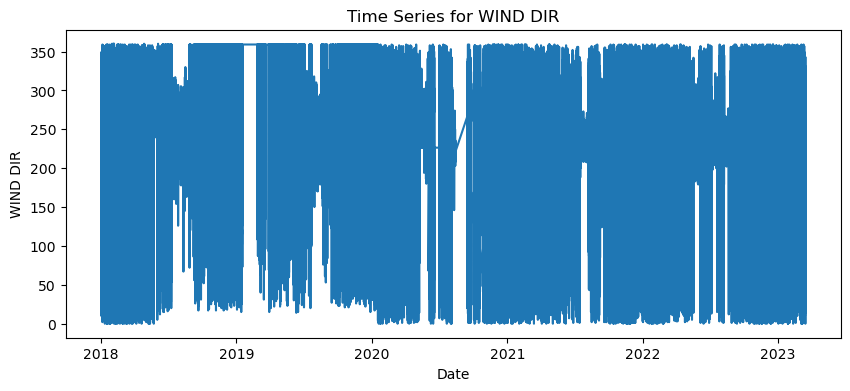

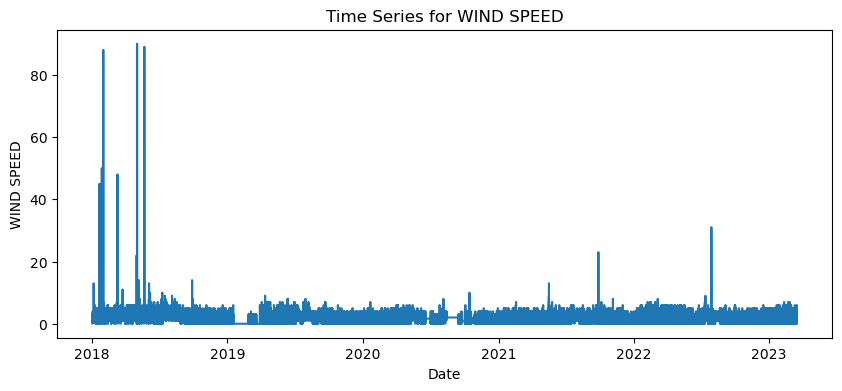

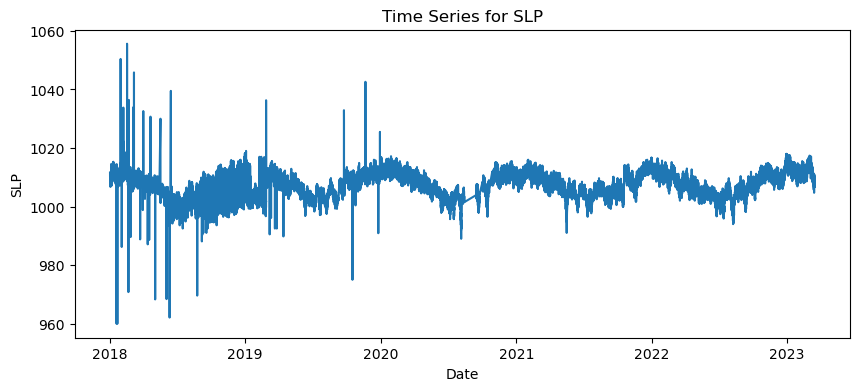

In [45]:
import matplotlib.pyplot as plt

for column in d.columns.drop('Datetime'):
    plt.figure(figsize=(10, 4))
    plt.plot(d['Datetime'], d[column])
    plt.title(f'Time Series for {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.show()

In [47]:
data.to_csv('C:/Users/MITUL/Documents/csv/time_series/imd/data1.csv', index=False)


In [48]:
d.to_csv('C:/Users/MITUL/Documents/csv/time_series/imd/data2.csv', index=False)


In [1]:
import os
import pandas as pd

# Change to the directory containing the CSV file
directory = 'C:\\Users\\MITUL\\Documents\\csv\\time_series\\imd'  # Directory containing the CSV file
os.chdir(directory)

In [2]:
csv_file = 'data1.csv'  # CSV file name
d = pd.read_csv(csv_file)

In [3]:
data=d

In [4]:
import matplotlib.pyplot as plt

In [5]:
d.columns



Index(['Datetime', 'RAINFALL', 'TEMP', 'RH', 'WIND DIR', 'WIND SPEED', 'SLP'], dtype='object')

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


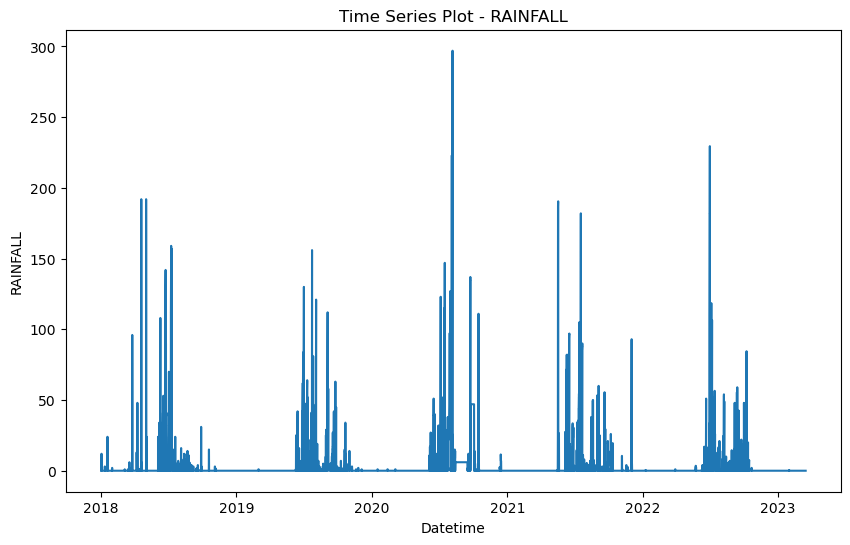

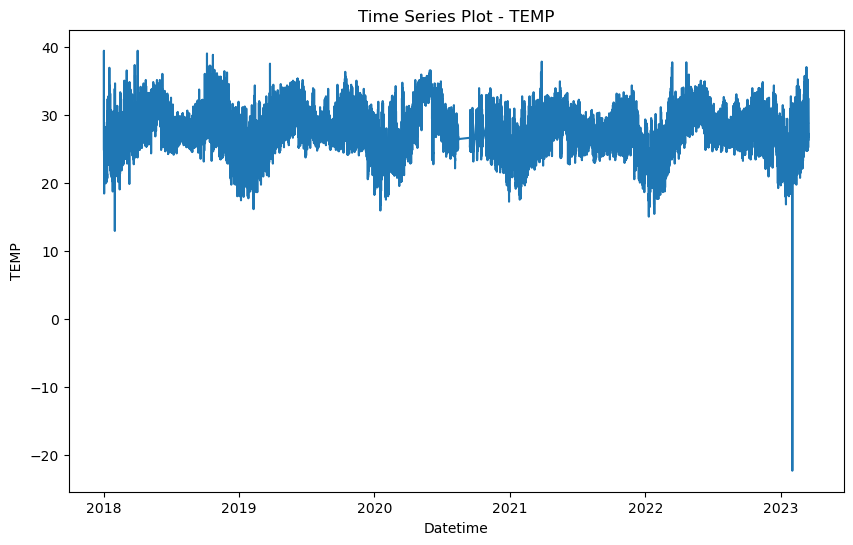

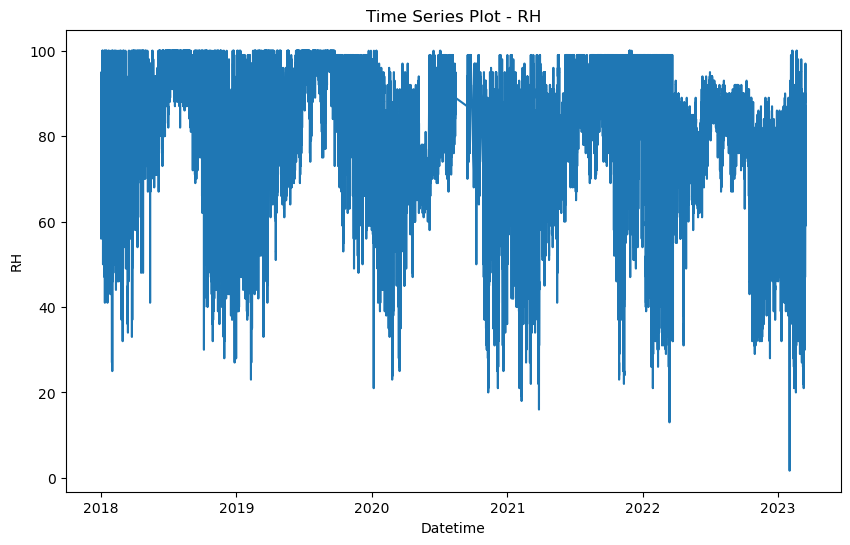

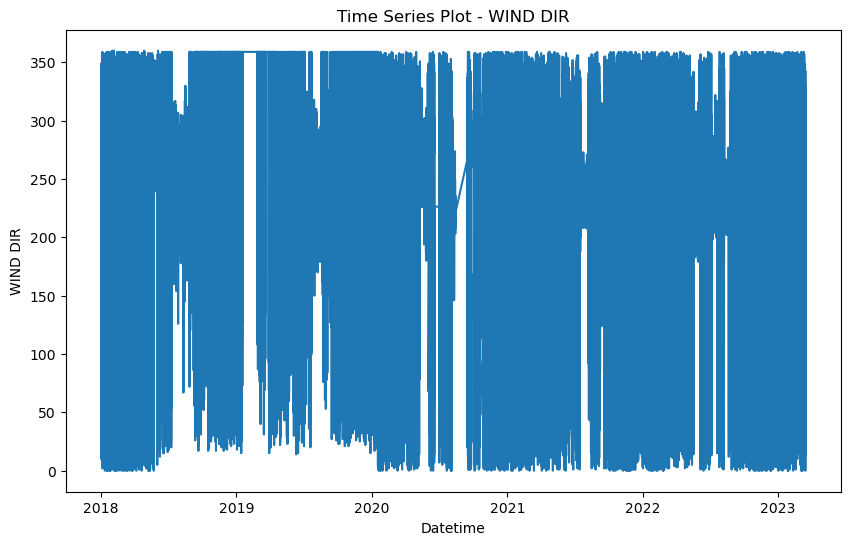

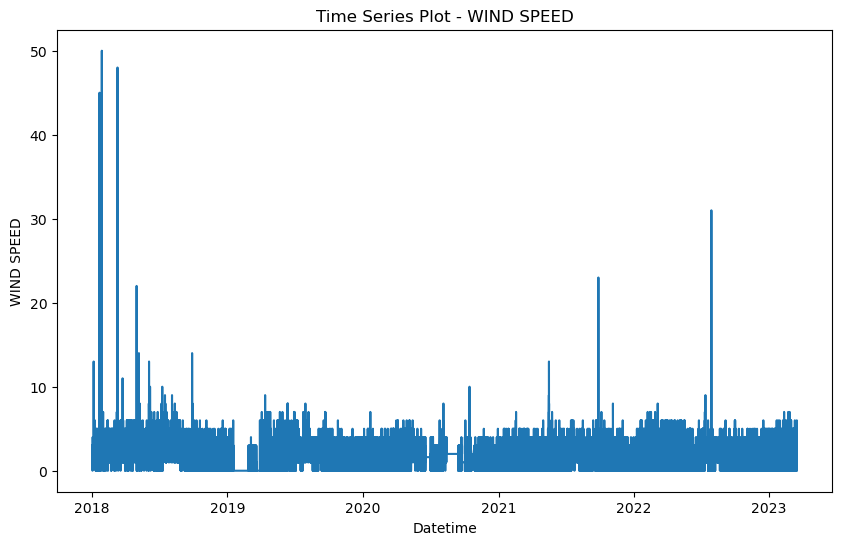

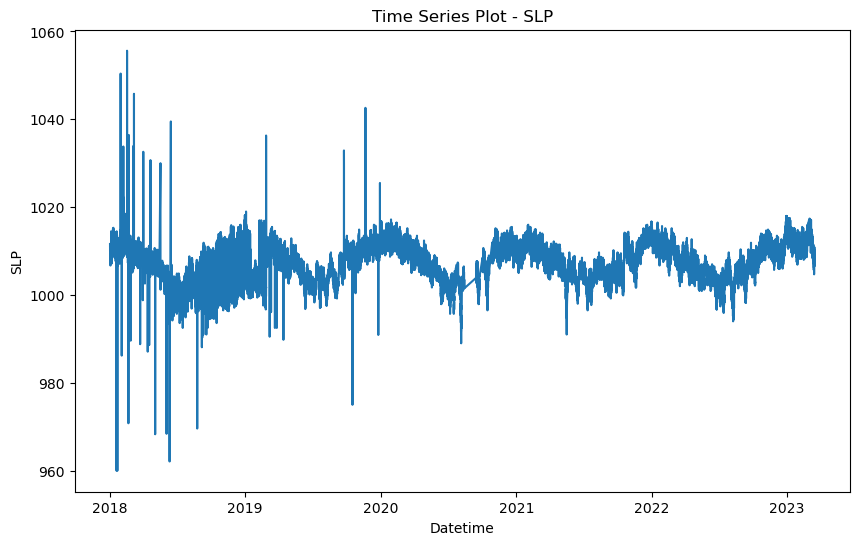

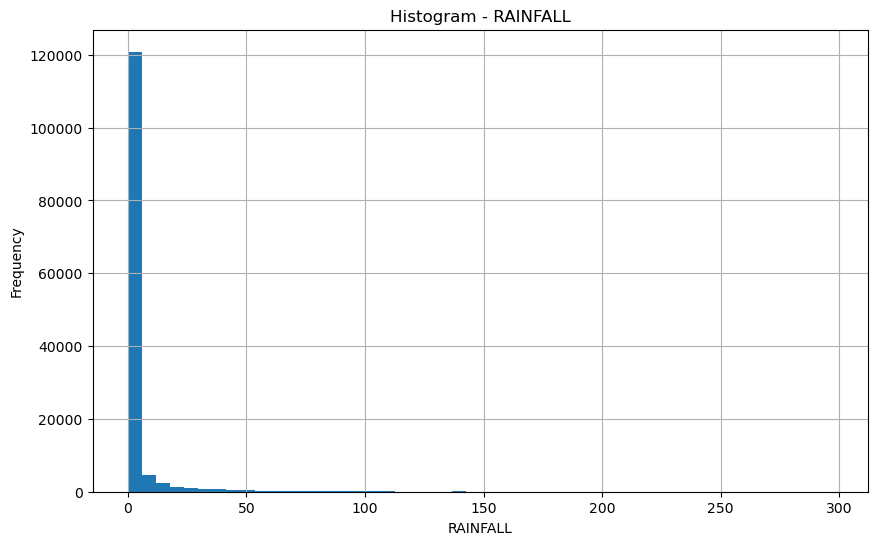

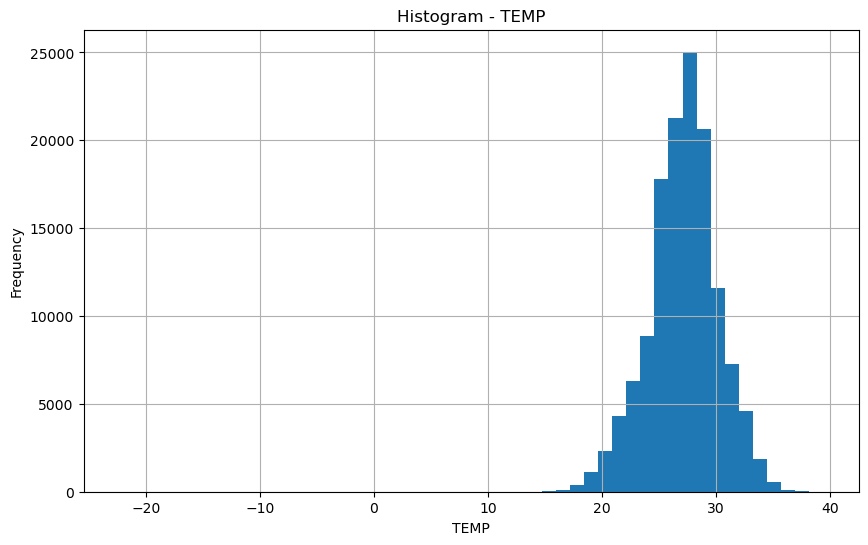

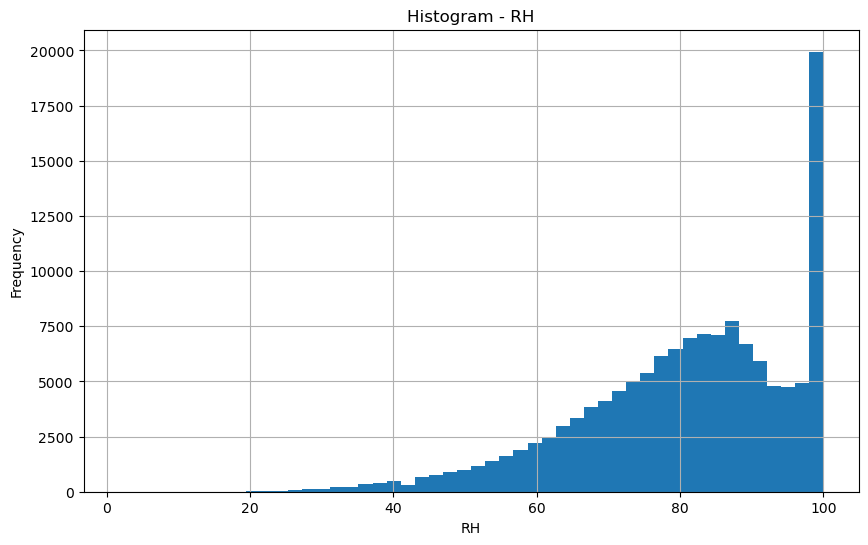

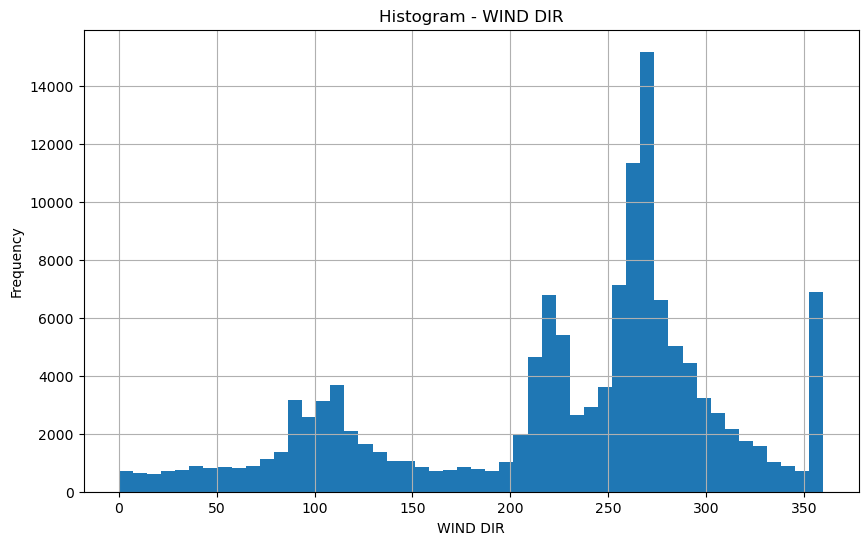

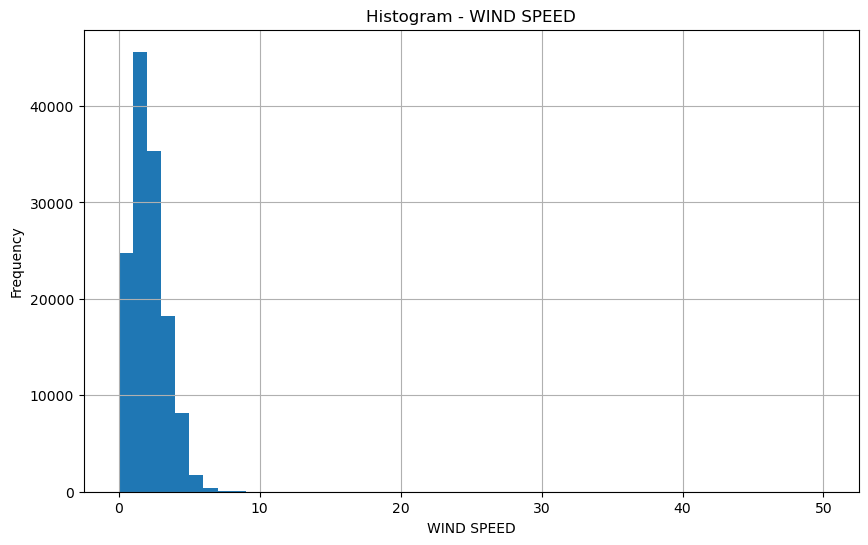

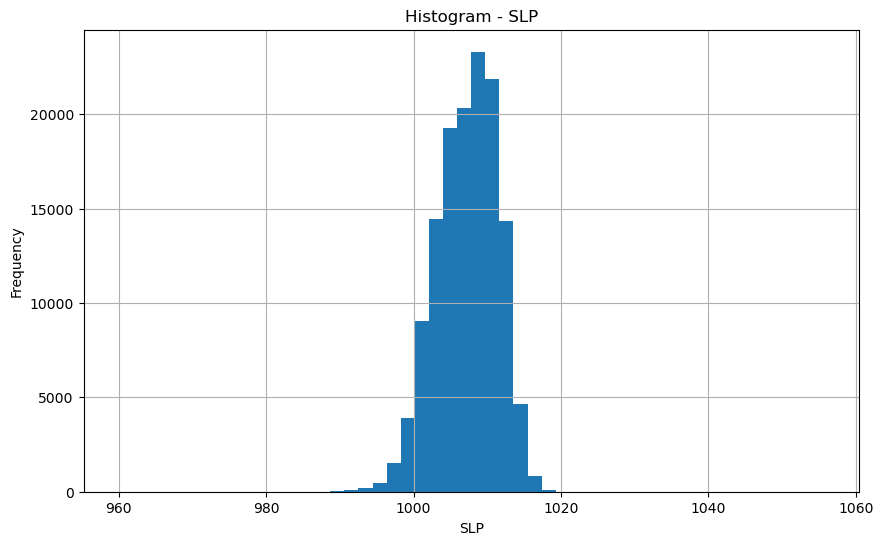

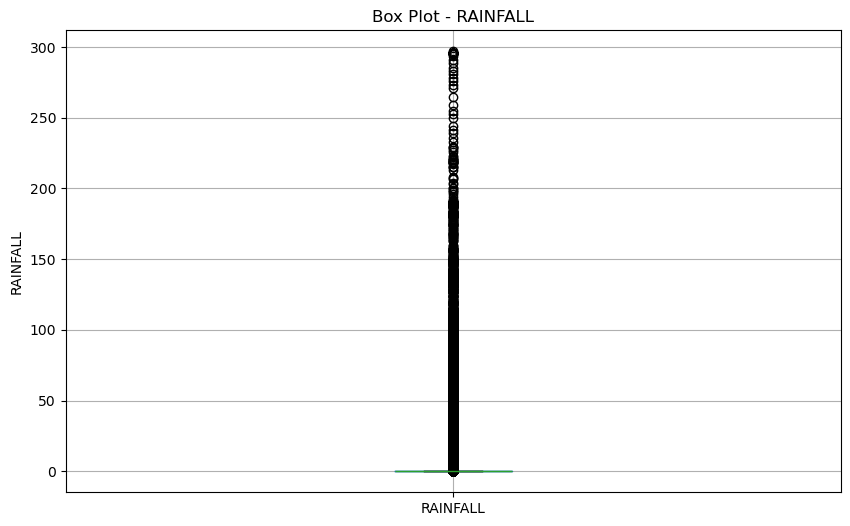

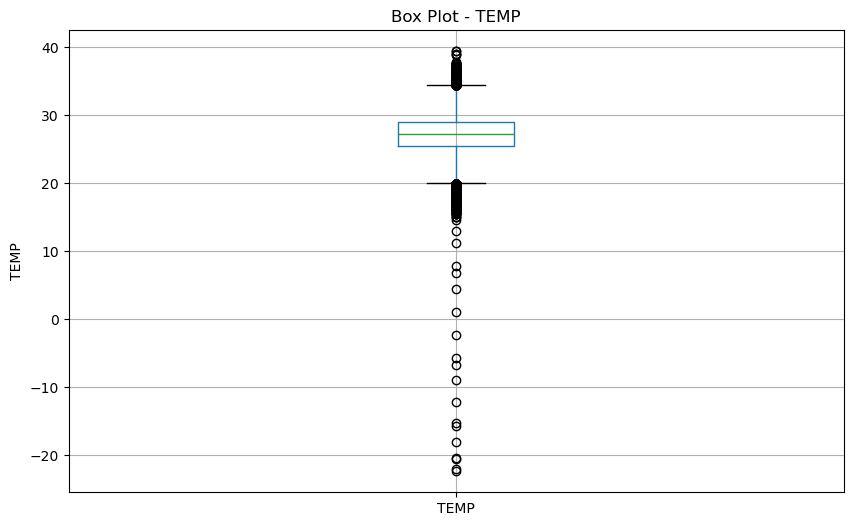

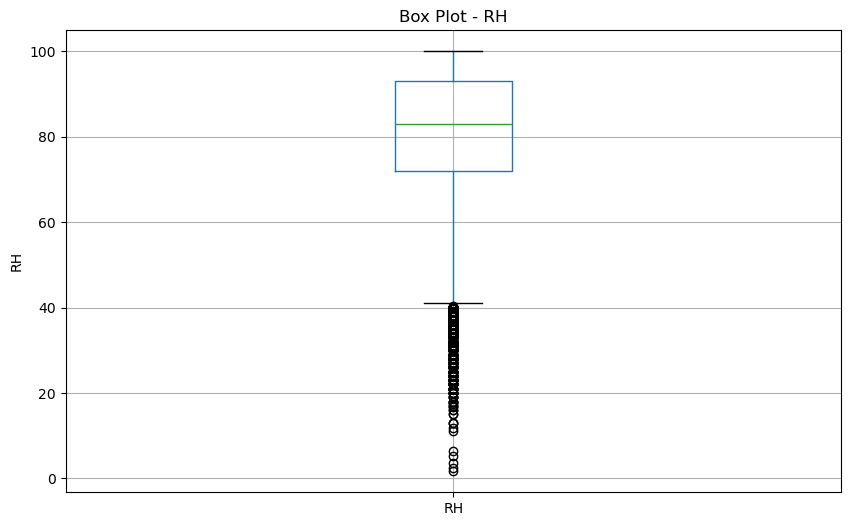

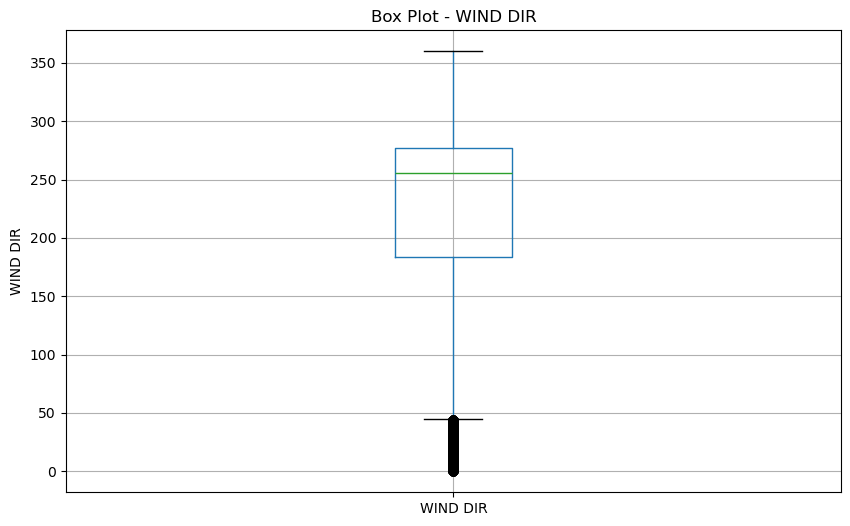

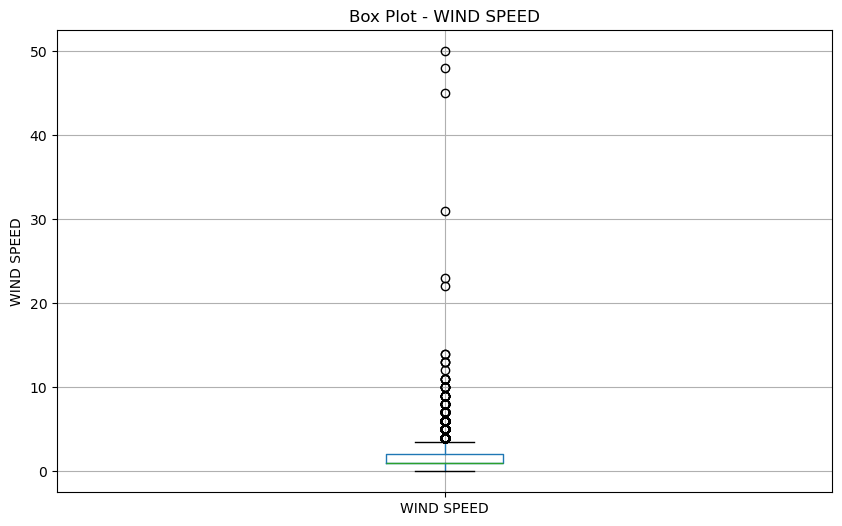

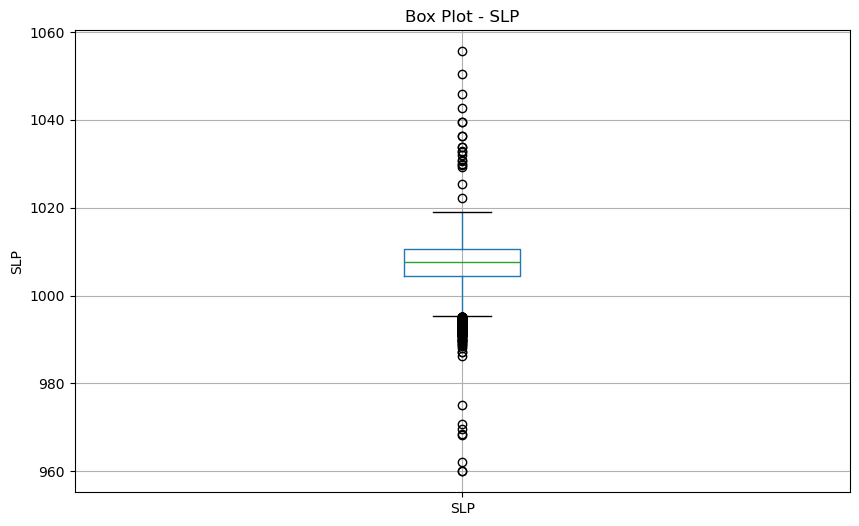

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv(csv_file, parse_dates=['Datetime'], index_col='Datetime')

# Time Series Line Plots
for column in data.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data[column])
    plt.title(f'Time Series Plot - {column}')
    plt.ylabel(column)
    plt.xlabel('Datetime')
    plt.show()

# Histograms
for column in data.columns:
    plt.figure(figsize=(10, 6))
    data[column].hist(bins=50)
    plt.title(f'Histogram - {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Box Plots
for column in data.columns:
    plt.figure(figsize=(10, 6))
    data.boxplot(column=column)
    plt.title(f'Box Plot - {column}')
    plt.ylabel(column)
    plt.show()


In [7]:
data

,RAINFALL,TEMP,RH,WIND DIR,WIND SPEED,SLP
Datetime,,,,,,
2018-01-01 05:00:00,0.0,24.9,78.0,129.0,3.0,1011.6
2018-01-01 06:00:00,0.0,39.4,64.0,113.0,3.0,1011.0
2018-01-01 07:00:00,0.0,27.8,56.0,289.0,3.0,1009.9
2018-01-01 08:00:00,0.0,26.9,65.0,337.0,3.0,1008.6
2018-01-01 09:00:00,0.0,26.8,69.0,329.0,3.0,1007.6
...,...,...,...,...,...,...
2023-03-16 14:00:00,0.0,27.9,86.0,236.0,0.0,1009.2
2023-03-16 14:15:00,0.0,27.7,86.0,170.0,0.0,1009.4
2023-03-16 14:30:00,0.0,26.5,73.0,108.0,6.0,1009.6


In [7]:
from scipy.signal import savgol_filter

# Setting the window size and polynomial order
window_size = 9
poly_order = 2

# Applying the Savitzky-Golay filter to each column except 'Datetime'
filtered_data = data.copy()
for column in filtered_data.columns:
    if column != 'Datetime':
        filtered_data[column] = savgol_filter(filtered_data[column], window_size, poly_order)

# Displaying the first few rows of the filtered data
filtered_data.head()


,RAINFALL,TEMP,RH,WIND DIR,WIND SPEED,SLP
Datetime,,,,,,
2018-01-01 05:00:00,0.0,30.212121,71.927273,110.418182,2.872727,1012.064242
2018-01-01 06:00:00,0.0,29.869697,67.581818,185.154545,3.018182,1010.619394
2018-01-01 07:00:00,0.0,29.415584,64.987446,246.042424,3.103030,1009.441645
2018-01-01 08:00:00,0.0,28.849784,64.144156,293.081818,3.127273,1008.530996
2018-01-01 09:00:00,0.0,28.172294,65.051948,326.272727,3.090909,1007.887446


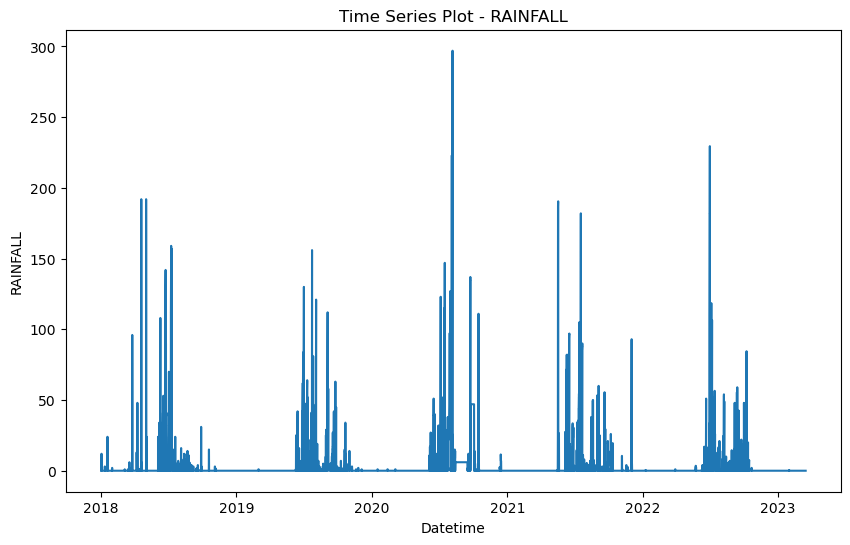

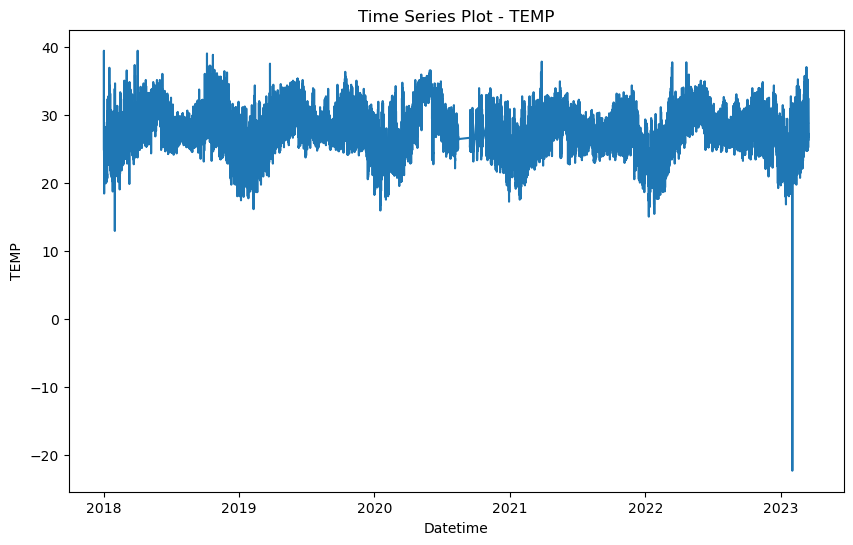

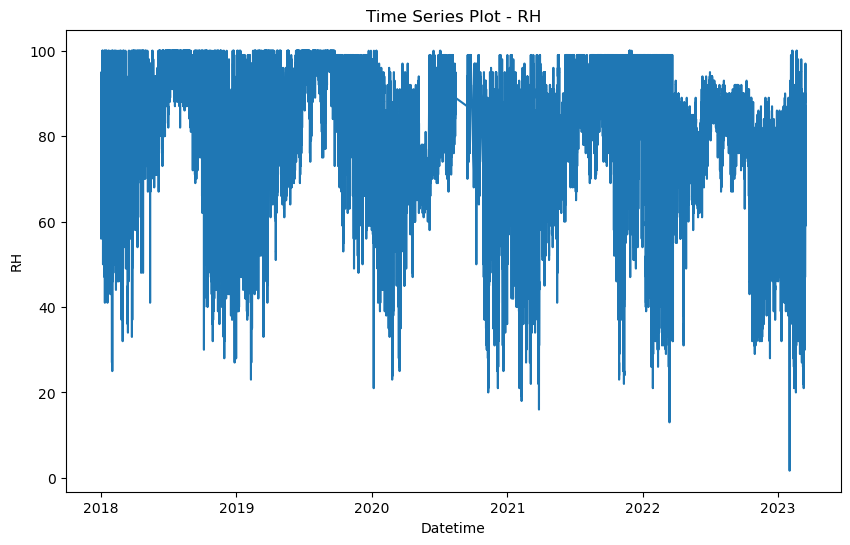

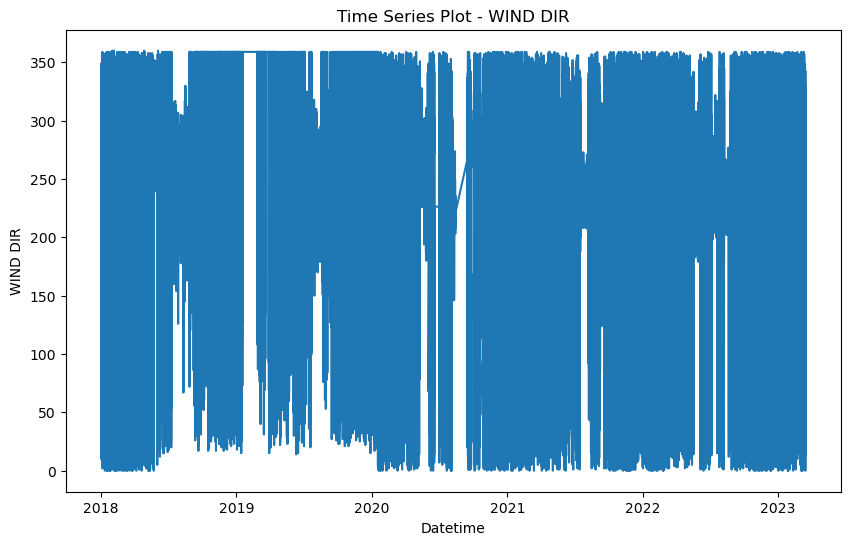

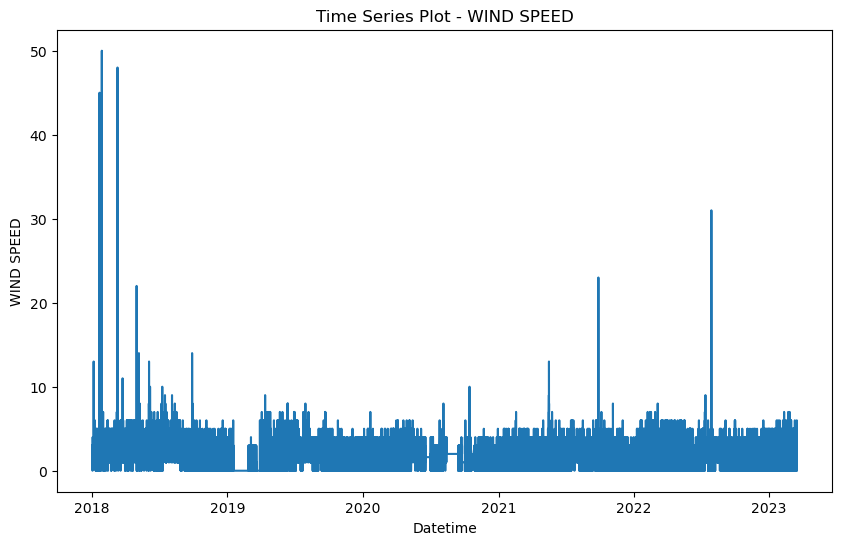

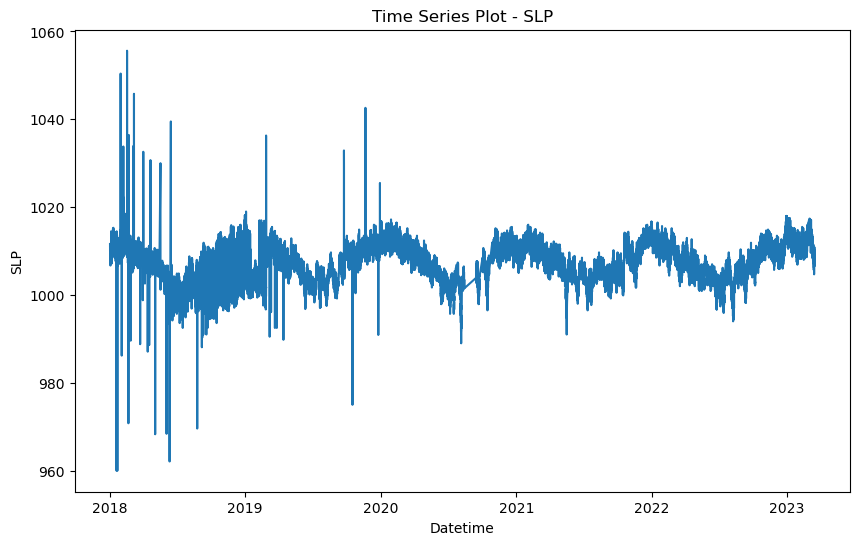

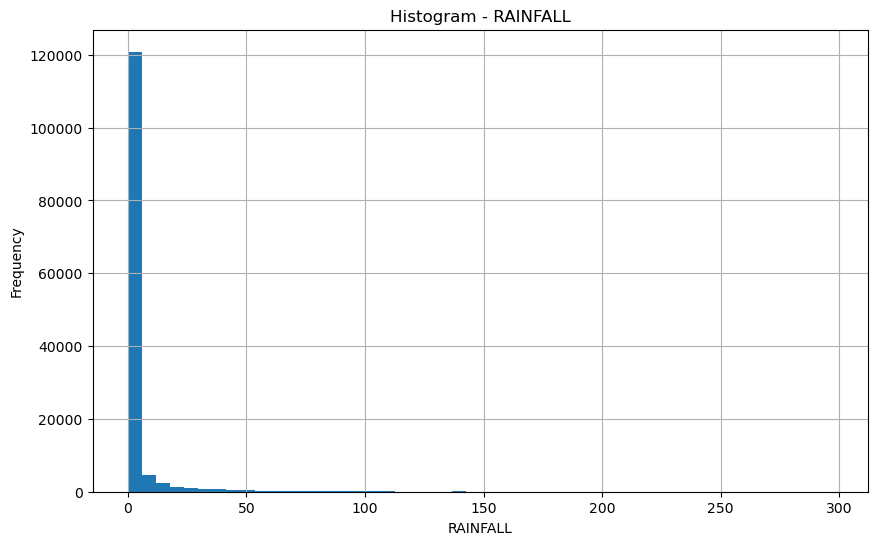

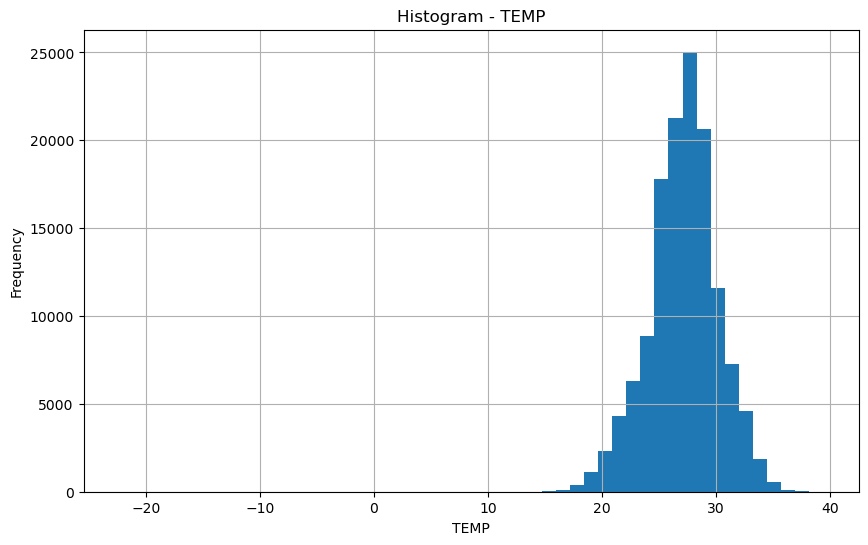

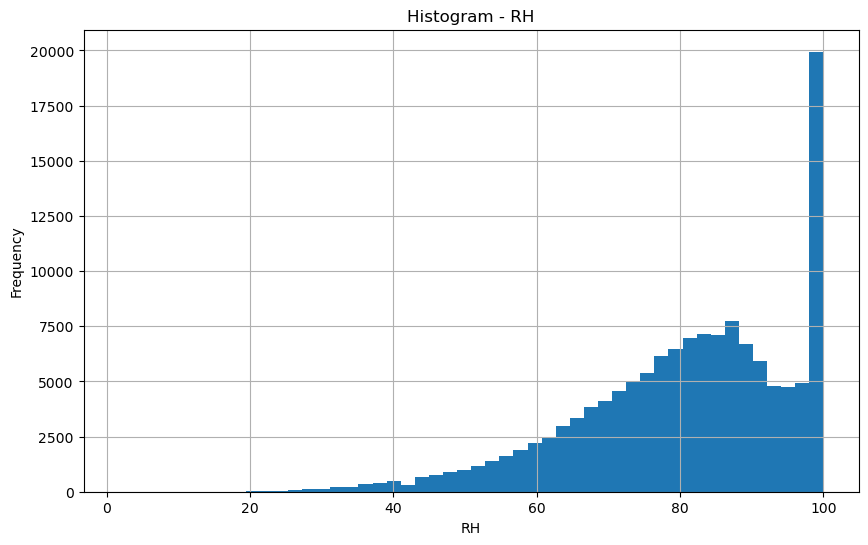

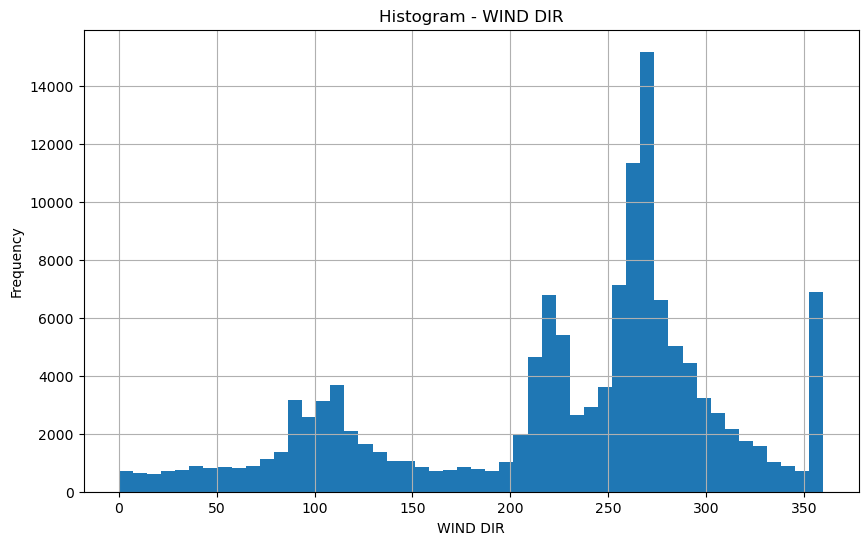

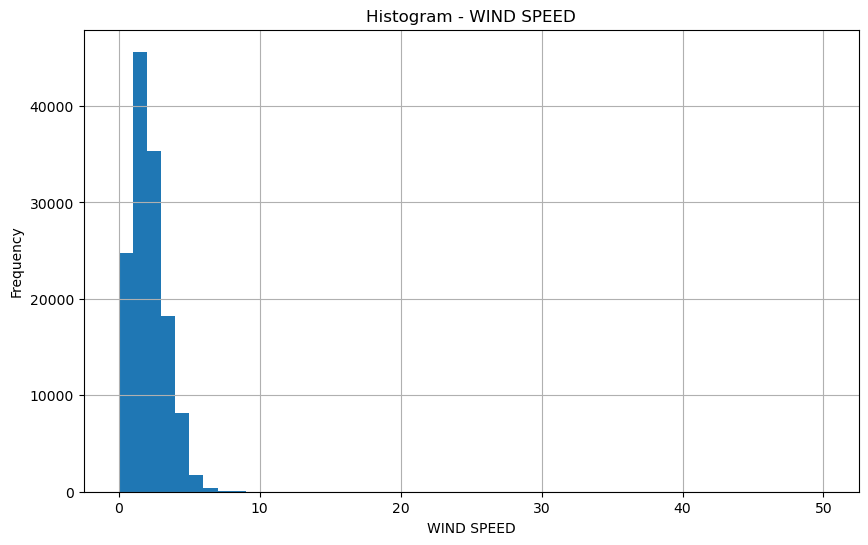

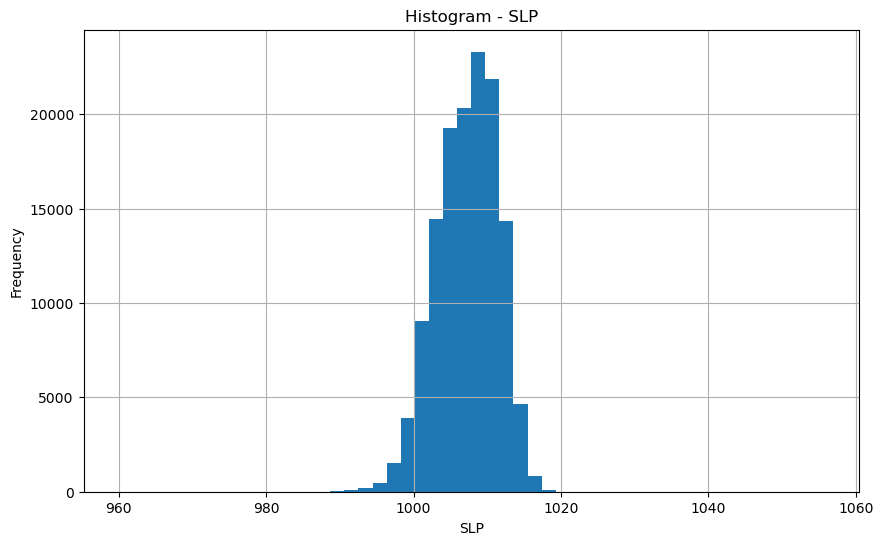

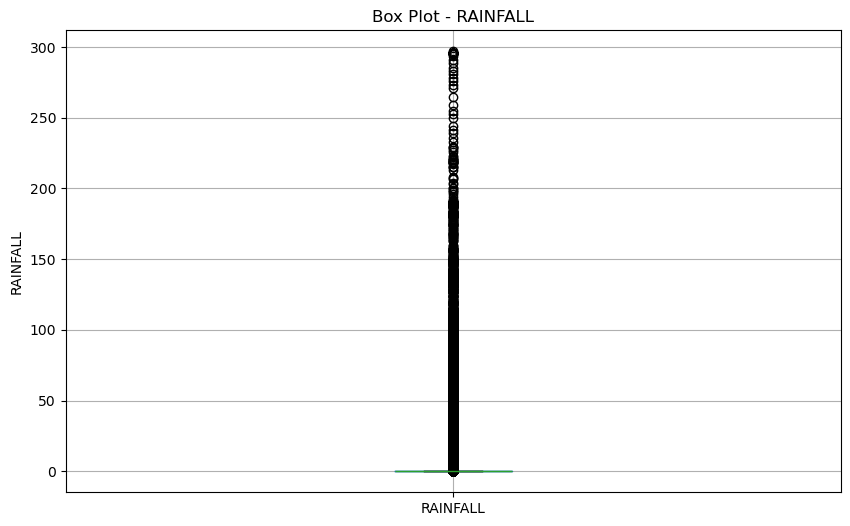

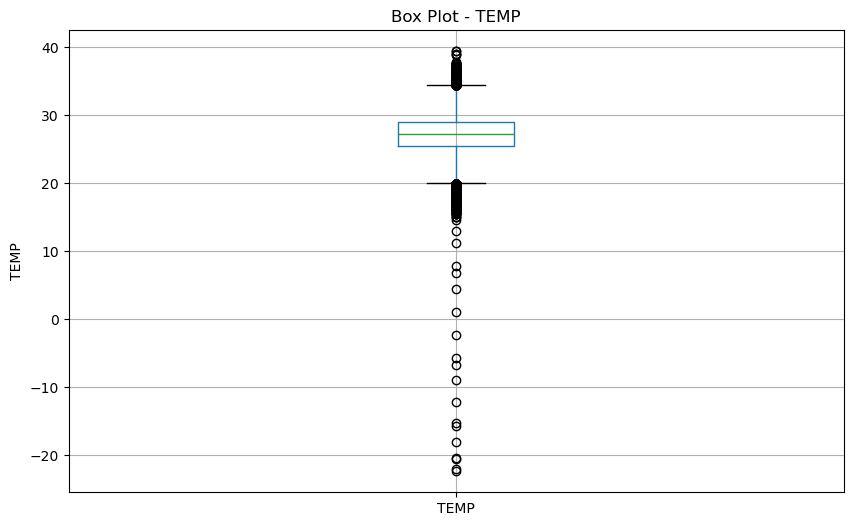

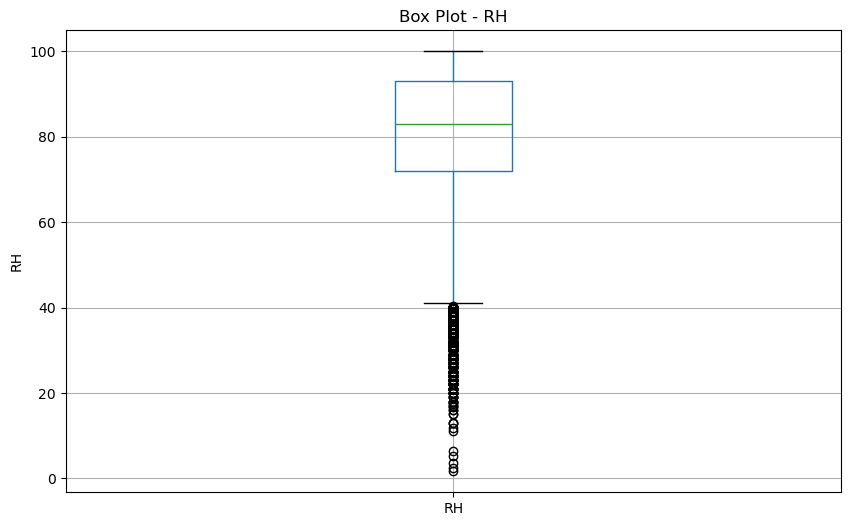

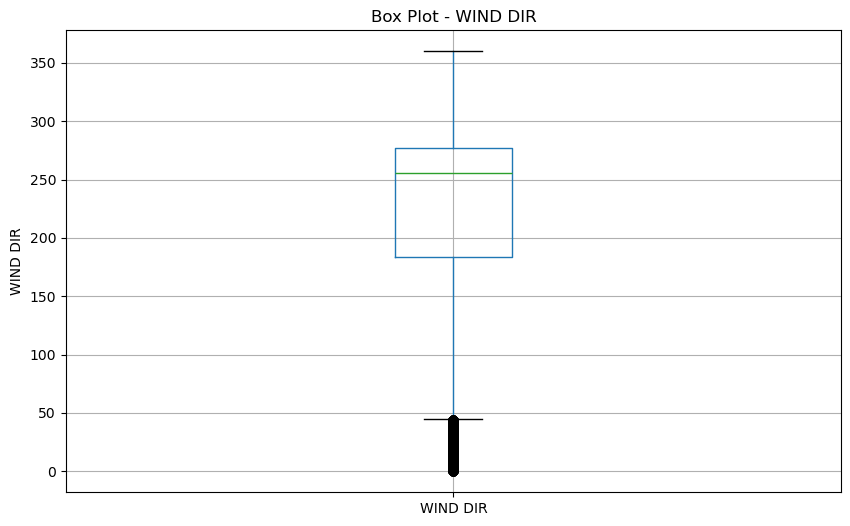

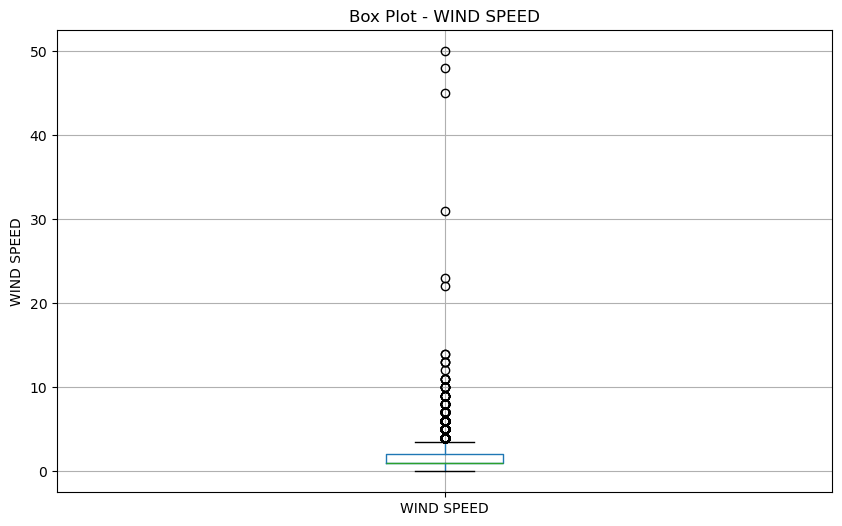

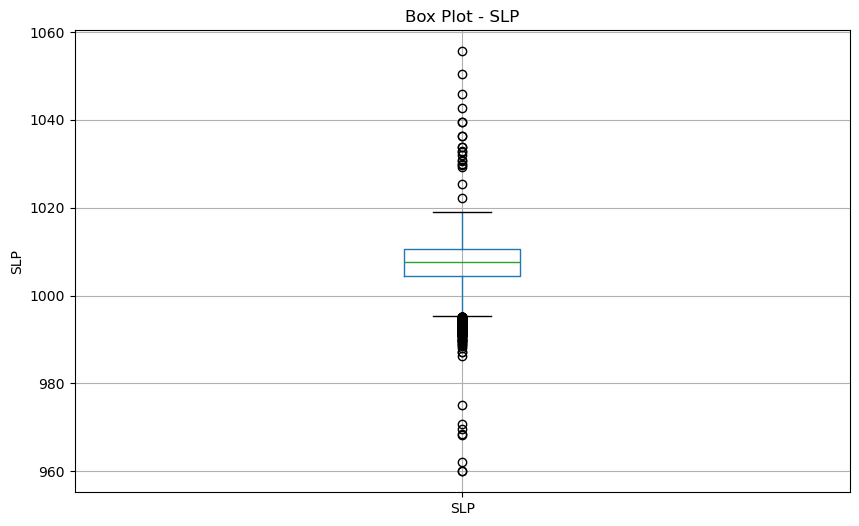

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv(csv_file, parse_dates=['Datetime'], index_col='Datetime')

# Time Series Line Plots
for column in data.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data[column])
    plt.title(f'Time Series Plot - {column}')
    plt.ylabel(column)
    plt.xlabel('Datetime')
    plt.show()

# Histograms
for column in data.columns:
    plt.figure(figsize=(10, 6))
    data[column].hist(bins=50)
    plt.title(f'Histogram - {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Box Plots
for column in data.columns:
    plt.figure(figsize=(10, 6))
    data.boxplot(column=column)
    plt.title(f'Box Plot - {column}')
    plt.ylabel(column)
    plt.show()


In [9]:
from scipy.signal import savgol_filter
# Apply Savitzky-Golay filter
window_length, polyorder = 5, 2
for column in data.columns[1:]:
    data[column] = savgol_filter(data[column], window_length, polyorder)

In [10]:
data

,RAINFALL,TEMP,RH,WIND DIR,WIND SPEED,SLP
Datetime,,,,,,
2018-01-01 05:00:00,0.0,28.257143,77.371429,98.600000,3.000000,1011.677143
2018-01-01 06:00:00,0.0,31.351429,64.314286,185.000000,3.000000,1010.851429
2018-01-01 07:00:00,0.0,31.802857,58.828571,255.400000,3.000000,1009.882857
2018-01-01 08:00:00,0.0,26.051429,62.942857,338.542857,3.000000,1008.608571
2018-01-01 09:00:00,0.0,26.997143,68.742857,332.000000,3.000000,1007.677143
...,...,...,...,...,...,...
2023-03-16 14:00:00,0.0,27.960000,87.114286,207.971429,-0.257143,1009.208571
2023-03-16 14:15:00,0.0,27.485714,82.657143,173.171429,1.885714,1009.408571
2023-03-16 14:30:00,0.0,26.722857,75.914286,122.485714,3.085714,1009.557143


In [13]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import savgol_filter
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [14]:
# Create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)


In [15]:
seq_length = 24
X, y = create_sequences(data_scaled, seq_length)

In [35]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [36]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)


In [18]:
# Define a dataset
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


In [37]:
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)
val_dataset = TimeSeriesDataset(X_test, y_test)

In [38]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [39]:
# Training and validation loop
train_losses = []
val_losses = []

In [40]:
# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, input_seq):
        lstm_out, _ = self.lstm(input_seq)
        predictions = self.linear(lstm_out[:, -1, :])  # Taking the last time step
        return predictions

In [23]:
# Model, Loss, Optimizer
input_size = X_train.shape[2]
hidden_layer_size = 50
output_size = y_train.shape[1]

In [32]:
model = LSTMModel(input_size, hidden_layer_size, output_size)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [25]:
device = torch.device("cuda")
print("Using device:", device)

Using device: cuda


In [33]:
model.to(device)

LSTMModel(
  (lstm): LSTM(6, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=6, bias=True)
)

In [27]:
train_losses = []
val_losses = []

In [29]:
epochs=32

Epoch 1 	 Training Loss: 0.004171 	 Validation Loss: 0.001022
Epoch 2 	 Training Loss: 0.000968 	 Validation Loss: 0.000920
Epoch 3 	 Training Loss: 0.000892 	 Validation Loss: 0.000909
Epoch 4 	 Training Loss: 0.000858 	 Validation Loss: 0.000858
Epoch 5 	 Training Loss: 0.000844 	 Validation Loss: 0.000849
Epoch 6 	 Training Loss: 0.000830 	 Validation Loss: 0.000836
Epoch 7 	 Training Loss: 0.000819 	 Validation Loss: 0.000802
Epoch 8 	 Training Loss: 0.000803 	 Validation Loss: 0.000799
Epoch 9 	 Training Loss: 0.000781 	 Validation Loss: 0.000790
Epoch 10 	 Training Loss: 0.000769 	 Validation Loss: 0.000763
Epoch 11 	 Training Loss: 0.000763 	 Validation Loss: 0.000782
Epoch 12 	 Training Loss: 0.000759 	 Validation Loss: 0.000793
Epoch 13 	 Training Loss: 0.000756 	 Validation Loss: 0.000766
Epoch 14 	 Training Loss: 0.000753 	 Validation Loss: 0.000764
Epoch 15 	 Training Loss: 0.000750 	 Validation Loss: 0.000762
Epoch 16 	 Training Loss: 0.000746 	 Validation Loss: 0.000749
E

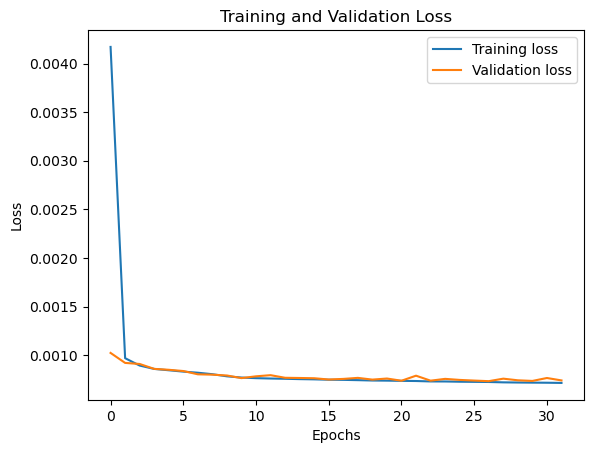

In [34]:
for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    for inputs, labels in train_loader:
        # Move data and labels to device
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        y_pred = model(inputs)
        loss = loss_function(y_pred, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    train_loss = train_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            # Move data and labels to device
            inputs, labels = inputs.to(device), labels.to(device)

            y_pred = model(inputs)
            loss = loss_function(y_pred, labels)
            val_loss += loss.item() * inputs.size(0)
    val_loss = val_loss / len(val_loader.dataset)
    val_losses.append(val_loss)

    print(f'Epoch {epoch+1} \t Training Loss: {train_loss:.6f} \t Validation Loss: {val_loss:.6f}')

# Plotting the training and validation loss
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [45]:
model1 = LSTMModel(input_size, hidden_layer_size, output_size)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model1.parameters(), lr=0.001)

In [46]:
model1.to(device)

LSTMModel(
  (lstm): LSTM(6, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=6, bias=True)
)

In [50]:
train_losse = []
val_losse = []

Epoch 1 	 Training Loss: 0.003788 	 Validation Loss: 0.001148
Epoch 2 	 Training Loss: 0.001044 	 Validation Loss: 0.000821
Epoch 3 	 Training Loss: 0.000912 	 Validation Loss: 0.000818
Epoch 4 	 Training Loss: 0.000880 	 Validation Loss: 0.000783
Epoch 5 	 Training Loss: 0.000859 	 Validation Loss: 0.000757
Epoch 6 	 Training Loss: 0.000845 	 Validation Loss: 0.000794
Epoch 7 	 Training Loss: 0.000829 	 Validation Loss: 0.000793
Epoch 8 	 Training Loss: 0.000801 	 Validation Loss: 0.000758
Epoch 9 	 Training Loss: 0.000788 	 Validation Loss: 0.000731
Epoch 10 	 Training Loss: 0.000782 	 Validation Loss: 0.000702
Epoch 11 	 Training Loss: 0.000776 	 Validation Loss: 0.000701
Epoch 12 	 Training Loss: 0.000771 	 Validation Loss: 0.000690
Epoch 13 	 Training Loss: 0.000766 	 Validation Loss: 0.000720
Epoch 14 	 Training Loss: 0.000762 	 Validation Loss: 0.000700
Epoch 15 	 Training Loss: 0.000759 	 Validation Loss: 0.000700
Epoch 16 	 Training Loss: 0.000756 	 Validation Loss: 0.000686
E

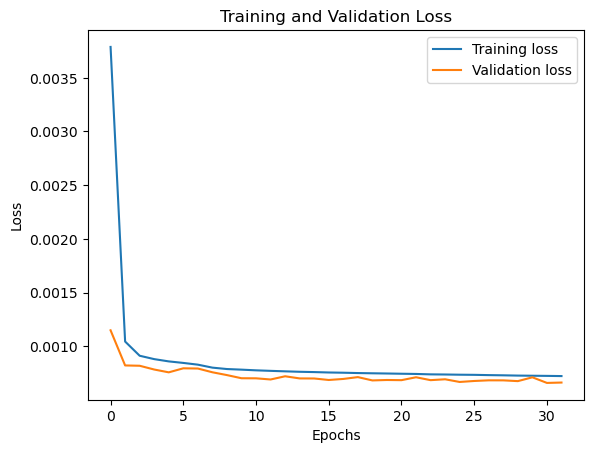

In [51]:
for epoch in range(epochs):
    model1.train()
    train_los = 0.0
    for inputs, labels in train_loader:
        # Move data and labels to device
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        y_pred = model1(inputs)
        loss = loss_function(y_pred, labels)
        loss.backward()
        optimizer.step()
        train_los += loss.item() * inputs.size(0)
    train_los = train_los / len(train_loader.dataset)
    train_losse.append(train_los)

    model.eval()
    val_los = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            # Move data and labels to device
            inputs, labels = inputs.to(device), labels.to(device)

            y_pred = model1(inputs)
            loss = loss_function(y_pred, labels)
            val_los += loss.item() * inputs.size(0)
    val_los = val_los / len(val_loader.dataset)
    val_losse.append(val_los)

    print(f'Epoch {epoch+1} \t Training Loss: {train_los:.6f} \t Validation Loss: {val_los:.6f}')

# Plotting the training and validation loss
plt.plot(train_losse, label='Training loss')
plt.plot(val_losse, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()